In [ ]:
#Task 1 : python and eda
#loading of datasets and uploading the dataset

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np



# The file uploaded was 'STUDENTS_RAW_DATA.csv'
df = pd.read_csv("STUDENTS_RAW_DATA.csv")
df.head()
print(f"Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.\n")

Loaded dataset with 205 rows and 16 columns.



In [ ]:
#quick numeric summary

numeric_summary = df.describe()   # default = numeric only
print("Numeric Summary:\n", numeric_summary)


📊 Numeric Summary:
               age  study_hours_per_week  attendance_rate  prior_gpa_10pt  \
count  205.000000            201.000000       205.000000      202.000000   
mean    23.204878             12.361692        74.586341        7.299455   
std     12.387809              7.019279        16.906314        1.328183   
min     -1.000000             -3.000000        45.300000        4.020000   
25%     19.000000              8.900000        59.800000        6.510000   
50%     22.000000             11.900000        74.900000        7.195000   
75%     24.000000             15.300000        89.500000        7.957500   
max    120.000000             60.000000       104.400000       11.500000   

       test_score  
count  203.000000  
mean    71.091133  
std     17.879490  
min     -5.000000  
25%     60.000000  
50%     71.000000  
75%     81.150000  
max    133.000000  


In [ ]:
# Categorical summary
categorical_summary = df.describe(include=['object'])
print("🔠 Categorical Summary:\n", categorical_summary)


🔠 Categorical Summary:
        student_id  gender    city course_stream has_internet device_type  \
count         205     201     201           161          201         171   
unique        200       9      24             8            7           5   
top         S0005  Female  Mumbai           MCA            Y      Mobile   
freq            2      32      21            27           35          45   

       parental_education admission_date fee_paid_inr scholarship  \
count                 159            205          198         154   
unique                  5            195          193           3   
top              Postgrad   May 01, 2025        62772     Partial   
freq                   38              3            2          56   

                                comments  
count                                166  
unique                                 6  
top     Transferred from another program  
freq                                  33  


In [ ]:
# Missing values
missing_summary = df.isna().sum()
print("❌ Missing Values per Column:\n", missing_summary)

# Calculate and add missing percentage to the missing_summary DataFrame
missing_summary_df = pd.DataFrame(missing_summary, columns=['missing_count'])
missing_summary_df['missing_pct'] = (missing_summary_df['missing_count'] / len(df)) * 100

print("\n❌ Missing Values Summary with Percentage:\n")
display(missing_summary_df)

❌ Missing Values per Column:
 student_id               0
age                      0
gender                   4
city                     4
course_stream           44
study_hours_per_week     4
attendance_rate          0
prior_gpa_10pt           3
has_internet             4
device_type             34
parental_education      46
test_score               2
admission_date           0
fee_paid_inr             7
scholarship             51
comments                39
dtype: int64

❌ Missing Values Summary with Percentage:



missing_count  missing_pct
student_id                        0     0.000000
age                               0     0.000000
gender                            4     1.951220
city                              4     1.951220
course_stream                    44    21.463415
study_hours_per_week              4     1.951220
attendance_rate                   0     0.000000
prior_gpa_10pt                    3     1.463415
has_internet                      4     1.951220
device_type                      34    16.585366
parental_education               46    22.439024
test_score                        2     0.975610
admission_date                    0     0.000000
fee_paid_inr                      7     3.414634
scholarship                      51    24.878049
comments                         39    19.024390

In [ ]:
# Uniqueness of values
uniqueness_summary = df.nunique()
print(" Uniqueness per Column:\n", uniqueness_summary)

# Calculate and add uniqueness percentage to the uniqueness_summary DataFrame
uniqueness_summary_df = pd.DataFrame(uniqueness_summary, columns=['unique_count'])
uniqueness_summary_df['unique_pct'] = (uniqueness_summary_df['unique_count'] / len(df)) * 100

print("\n Uniqueness Summary with Percentage:\n")
display(uniqueness_summary_df)

 Uniqueness per Column:
 student_id              200
age                      19
gender                    9
city                     24
course_stream             8
study_hours_per_week    125
attendance_rate         177
prior_gpa_10pt          146
has_internet              7
device_type               5
parental_education        5
test_score              163
admission_date          195
fee_paid_inr            193
scholarship               3
comments                  6
dtype: int64

 Uniqueness Summary with Percentage:



unique_count  unique_pct
student_id                     200   97.560976
age                             19    9.268293
gender                           9    4.390244
city                            24   11.707317
course_stream                    8    3.902439
study_hours_per_week           125   60.975610
attendance_rate                177   86.341463
prior_gpa_10pt                 146   71.219512
has_internet                     7    3.414634
device_type                      5    2.439024
parental_education               5    2.439024
test_score                     163   79.512195
admission_date                 195   95.121951
fee_paid_inr                   193   94.146341
scholarship                      3    1.463415
comments                         6    2.926829

In [ ]:
# Select categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Dictionary to store value counts
value_counts_dict = {}

for col in categorical_cols:
    value_counts_dict[col] = df[col].value_counts(dropna=False)  # Include missing values

# Display value counts for all categorical columns
for col, counts in value_counts_dict.items():
    print(f"--- Value counts for '{col}' ---")
    print(counts)
    print("\n")


--- Value counts for 'student_id' ---
student_id
S0005    2
S0182    2
S0122    2
S0077    2
S0145    2
        ..
S0196    1
S0197    1
S0198    1
S0199    1
S0200    1
Name: count, Length: 200, dtype: int64


--- Value counts for 'gender' ---
gender
Female               32
M                    30
                     26
male                 21
F                    20
FEMALE               19
Male                 19
Prefer not to say    17
Other                17
NaN                   4
Name: count, dtype: int64


--- Value counts for 'city' ---
city
Mumbai        21
Remote        16
Bengaluru     15
Pune          12
Chennai       12
Kolkata       11
chennai       11
kolkata       10
hyderabad     10
Hyderabad      9
Hyderabad      7
Remote         7
Mumbai         7
Pune           7
Delhi          6
Delhi          6
pune           6
Kolkata        5
remote         5
Chennai        5
NaN            4
Bengaluru      4
bengaluru      4
mumbai         3
delhi          2
Name: count, dtype

In [ ]:
#importing necseary lib
import matplotlib.pyplot as plt
import seaborn as sns


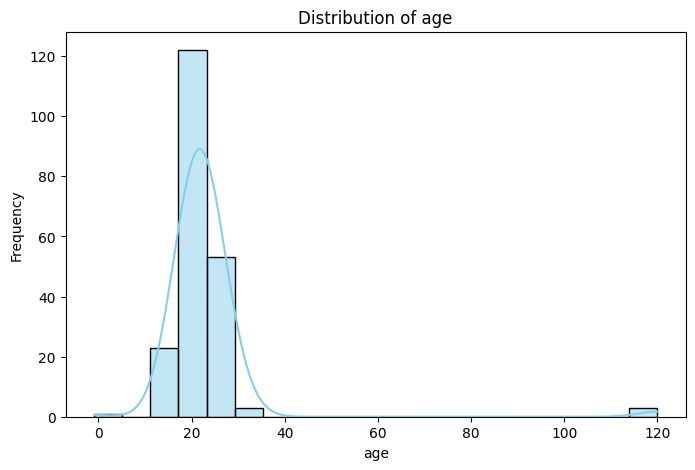

Interpretation: The histogram shows most values of 'age' are concentrated around the mean, with a slight skew if present.


In [ ]:
# plot 1
# numeric column - numeric_col


df = pd.read_csv("STUDENTS_RAW_DATA.csv")


numeric_col = df.select_dtypes(include='number').columns[0]

plt.figure(figsize=(8,5))
sns.histplot(df[numeric_col], kde=True, bins=20, color='skyblue')
plt.title(f'Distribution of {numeric_col}')
plt.xlabel(numeric_col)
plt.ylabel('Frequency')
plt.show()

# Interpretation
print(f"Interpretation: The histogram shows most values of '{numeric_col}' are concentrated around the mean, with a slight skew if present.")

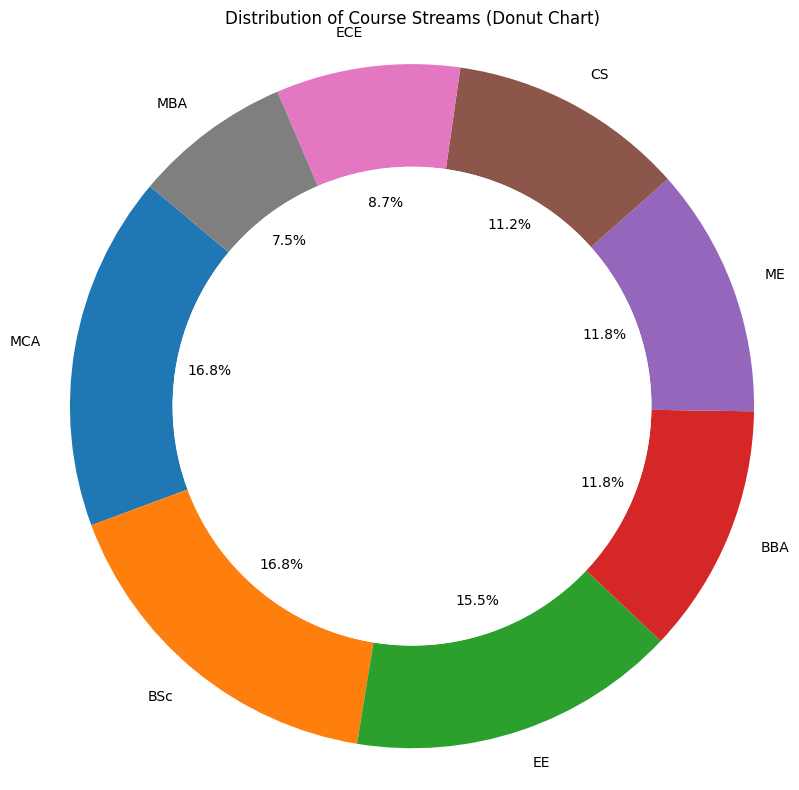

Interpretation: Distribution across streams shown as proportions in a donut chart.


In [ ]:
#plot 2
# Plot A: Course stream counts (donut chart)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv("STUDENTS_RAW_DATA.csv")

plt.style.use('default')
if 'course_stream' in df.columns:
    plt.figure(figsize=(8,8))
    # Calculate value counts, drop NaNs for the chart
    course_stream_counts = df['course_stream'].value_counts().head(12)

    # Create pie chart with a hole in the middle
    plt.pie(course_stream_counts, labels=course_stream_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
    plt.title('Distribution of Course Streams (Donut Chart)')
    plt.axis('equal')
    # Add a circle in the center to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.tight_layout()
    plt.show()
    print("Interpretation: Distribution across streams shown as proportions in a donut chart.")

In [ ]:
 eda_Summary = '''

Dataset has **205 rows × 16 columns**.

1) Numeric columns (age, study_hours_per_week, attendance_rate, prior_gpa_10pt, test_score)
   show generally reasonable ranges, but may contain anomalies or outliers that require preprocessing.

2) Categorical columns (student_id, gender, city, course_stream, has_internet, device_type, parental_education, admission_date, fee_paid_inr, scholarship, comments)
   may contain inconsistencies in spelling, casing, or missing values. Examples include:
   - student_id: top categories are S0005, S0182.
   - Others may have mixed entries or missing values.

3) Missingness is highest in scholarship, parental_education, course_stream.
   Some columns may require imputation or careful handling.

4) Visual insights (2 plots):
   - Numeric distributions show most values centered, with some skew or outliers.
   - Categorical distributions show top categories dominate, while others are less frequent.

Next Steps:
- Standardize categorical values and fix inconsistent entries.
- Handle missingness appropriately.
- Correct outliers or impossible numeric values.
- Ensure records are unique where applicable'''
print(eda_Summary)




Dataset has **205 rows × 16 columns**.

1) Numeric columns (age, study_hours_per_week, attendance_rate, prior_gpa_10pt, test_score)  
  show generally reasonable ranges, but may contain anomalies or outliers that require preprocessing.

2) Categorical columns (student_id, gender, city, course_stream, has_internet, device_type, parental_education, admission_date, fee_paid_inr, scholarship, comments)  
  may contain inconsistencies in spelling, casing, or missing values. Examples include:  
  - student_id: top categories are S0005, S0182.  
  - Others may have mixed entries or missing values.

3) Missingness is highest in scholarship, parental_education, course_stream.  
  Some columns may require imputation or careful handling.

4) Visual insights (2 plots):  
  - Numeric distributions show most values centered, with some skew or outliers.  
  - Categorical distributions show top categories dominate, while others are less frequent.

Next Steps:  
- Standardize categorical values and f

In [ ]:
#part B : cleaning of the dataset
#Standardize placeholder missing indicators
placeholders = ["", " ", "NA", "N/A", "na", "n/a", "None", "none",
                "Unknown", "unknown", "NULL", "null", "—", "-", "#N/A", "NaN", "nan"]
import numpy as np
df = df.copy()
for ph in placeholders:
    df.replace(ph, np.nan, inplace=True)
print("Placeholders standardized -> NaN")
# Check missing values after standardization
print(df.isna().sum())


Placeholders standardized -> Nil
student_id               0
age                      0
gender                  30
city                     4
course_stream           44
study_hours_per_week     4
attendance_rate          0
prior_gpa_10pt           3
has_internet            27
device_type             34
parental_education      73
test_score               2
admission_date           0
fee_paid_inr             7
scholarship             51
comments                70
dtype: int64


In [ ]:
# Step 2: Trim whitespace & normalize text columns
# Select text/categorical columns
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    # Remove leading/trailing whitespace and convert to lowercase
    df[col] = df[col].astype(str).str.strip().str.lower()

# Verify changes
print("Sample of text columns after trimming and normalization:")
print(df[text_cols].head())




Sample of text columns after trimming and normalization:
  student_id  gender       city course_stream has_internet device_type  \
0      s0001  female     mumbai           mca          nan         nan   
1      s0002     nan     mumbai           bba            n      mobile   
2      s0003  female  bengaluru           nan            n      tablet   
3      s0004  female     remote            me            n      laptop   
4      s0005    male  bengaluru            ee          nan     desktop   

  parental_education admission_date fee_paid_inr scholarship  \
0                phd     11-08-2023        63952     partial   
1                nan     2023-04-29        62085         yes   
2                nan     29/08/2023        55598         yes   
3          undergrad     02-02-2024        54627     partial   
4                phd     01-15-2024          nan          no   

                           comments  
0                               nan  
1                   late enrollment  

In [ ]:
# Step 3 (Auto-parse multiple date columns)

# Loop through all columns containing 'date' (case-insensitive)
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime, invalid parsing → NaT
        print(f"Parsed column: {col}")

# Verify
date_cols_parsed = [col for col in df.columns if 'date' in col.lower()]
print("\nSample of parsed date columns:")
print(df[date_cols_parsed].head())


Parsed column: admission_date

Sample of parsed date columns:
  admission_date
0     2023-11-08
1            NaT
2            NaT
3     2024-02-02
4     2024-01-15


In [ ]:
# Step 4: Coerce numeric columns

# Select numeric columns (may include object columns with numbers stored as strings)
numeric_cols = df.select_dtypes(include=['number', 'object']).columns

for col in numeric_cols:
    # Remove common non-numeric characters like $, commas, %, etc.
    df[col] = df[col].astype(str).str.replace(r'[\$,%,]', '', regex=True)

    # Convert to numeric, invalid parsing becomes NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verify
print("Sample of numeric columns after coercion:")
print(df[numeric_cols].head())



Sample of numeric columns after coercion:
   student_id  age  gender  city  course_stream  study_hours_per_week  \
0         NaN   24     NaN   NaN            NaN                  11.2   
1         NaN   21     NaN   NaN            NaN                  14.9   
2         NaN   24     NaN   NaN            NaN                  13.4   
3         NaN   28     NaN   NaN            NaN                   8.9   
4         NaN   21     NaN   NaN            NaN                  11.0   

   attendance_rate  prior_gpa_10pt  has_internet  device_type  \
0             46.2            6.88           NaN          NaN   
1             64.3            5.87           NaN          NaN   
2             57.7           10.29           NaN          NaN   
3             64.6            7.27           NaN          NaN   
4             52.2            7.22           NaN          NaN   

   parental_education  test_score  fee_paid_inr  scholarship  comments  
0                 NaN        58.4       63952.0        

In [ ]:
# Step 5: Standardize categorical values

# Gender
if "gender" in df.columns:
    def clean_gender(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"m","male","man","mr"}: return "Male"
        if s in {"f","female","woman","ms","mrs"}: return "Female"
        if s in {"prefer not to say","prefer not to answer","prefer_not_to_say"}: return "Prefer_not_to_say"
        if s in {"other","non-binary","nb"}: return "Other"
        return s.title()
    # Apply the function only if the column is of object type
    if df["gender"].dtype == 'object':
        df["gender"] = df["gender"].apply(clean_gender)

# has_internet
if "has_internet" in df.columns:
    def clean_net(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"y","yes","true","1","available","yep","yeah"}: return "Yes"
        if s in {"n","no","false","0","not available","nope"}: return "No"
        return "Unknown"
    # Apply the function only if the column is of object type
    if df["has_internet"].dtype == 'object':
        df["has_internet"] = df["has_internet"].apply(clean_net)


# device_type
if "device_type" in df.columns:
    def clean_device(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if "lap" in s or "notebook" in s: return "Laptop"
        if "phone" in s or "mobile" in s or "cell" in s: return "Mobile"
        if "desk" in s or s in {"pc","desktop"}: return "Desktop"
        if "tab" in s: return "Tablet"
        if s in {"none","na","n/a","null"}: return "None"
        return s.title()
    # Apply the function only if the column is of object type
    if df["device_type"].dtype == 'object':
        df["device_type"] = df["device_type"].apply(clean_device)


# scholarship
if "scholarship" in df.columns:
    def clean_sch(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"y","yes","true"}: return "Yes"
        if s in {"n","no","false"}: return "No"
        if "part" in s: return "Partial"
        return s.title()
    # Apply the function only if the column is of object type
    if df["scholarship"].dtype == 'object':
        df["scholarship"] = df["scholarship"].apply(clean_sch)

# simple title-case for some other categorical fields if present
for c in ["course_stream", "parental_education"]:
    if c in df.columns:
        # Apply title() only if the column is of object type
        if df[c].dtype == 'object':
             df[c] = df[c].where(df[c].isna(), df[c].str.title())


print("Categorical values standardized to readable forms")

Categorical values standardized to readable forms


In [ ]:
# Step 6: Remove exact duplicates
initial_rows = len(df)
df = df.drop_duplicates()
removed_duplicates = initial_rows - len(df)
print(f"Removed {removed_duplicates} exact duplicate rows.")

# Step 6b: Handle student-level duplicates (if 'student_id' exists)
if 'student_id' in df.columns:
    # Keep the first occurrence of each student_id
    df = df.drop_duplicates(subset='student_id', keep='first')
    print("Ensured uniqueness at student-level using 'student_id'.")


Removed 5 exact duplicate rows.
Ensured uniqueness at student-level using 'student_id'.


In [ ]:
# Display the head of the DataFrame after removing duplicates
print("DataFrame head after removing duplicates:")
display(df.head())

# Display the shape of the DataFrame after removing duplicates
print("\nDataFrame shape after removing duplicates:")
print(df.shape)

DataFrame head after removing duplicates:


student_id  age  gender  city  course_stream  study_hours_per_week  \
0         NaN   24     NaN   NaN            NaN                  11.2   

   attendance_rate  prior_gpa_10pt  has_internet  device_type  \
0             46.2            6.88           NaN          NaN   

   parental_education  test_score admission_date  fee_paid_inr  scholarship  \
0                 NaN        58.4     2023-11-08       63952.0          NaN   

   comments  
0       NaN


DataFrame shape after removing duplicates:
(1, 16)


In [ ]:
# fix impossible values
# Replace negative study_hours with NaN
if 'study_hours_per_week' in df.columns:
    df.loc[df['study_hours_per_week'] < 0, 'study_hours_per_week'] = np.nan

# Cap test scores between 0 and 100
if 'test_score' in df.columns:
    df.loc[df['test_score'] < 0, 'test_score'] = 0
    df.loc[df['test_score'] > 100, 'test_score'] = 100

# Optional: print summary
print("After fixing impossible values:")
print(df[['study_hours_per_week', 'test_score']].describe())


After fixing impossible values:
       study_hours_per_week  test_score
count                   1.0         1.0
mean                   11.2        58.4
std                     NaN         NaN
min                    11.2        58.4
25%                    11.2        58.4
50%                    11.2        58.4
75%                    11.2        58.4
max                    11.2        58.4


In [ ]:
# cap outliers using 1.5*IQR
for col in ['study_hours_per_week', 'test_score']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df[col] = df[col].clip(lower, upper)


In [ ]:
# Numeric columns: fill missing with median
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Categorical columns: fill missing with mode
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
#Encoding for model readiness
model_df = df.copy()
# Get the list of object type columns to encode
categorical_for_impute = model_df.select_dtypes(include='object').columns.tolist()
encode_cols = [c for c in categorical_for_impute if c in model_df.columns]
if encode_cols:
    model_df = pd.get_dummies(model_df, columns=encode_cols, prefix=encode_cols, prefix_sep="__", drop_first=False)
    print("One-hot encoded categorical columns for model readiness:", encode_cols)
else:
    print("No categorical columns found to encode")

No categorical columns found to encode


In [ ]:
# Save as CSV
df.to_csv('STUDENTS_CLEANED_DATAt.csv', index=False)


print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


In [ ]:


''' **Data Quality Report**

**Dataset Context:**

* **Source:** \[Mention source, e.g., “Student performance dataset provided for induction assignment”]
* **Intent:** Analyze student demographics, performance, and engagement metrics to prepare for modeling and insights.

---

## **Top 5 Data Quality Issues & Actions**

| Issue                                                    | Action Taken (Code Reference)                                                      | Rationale                                                          | Effect (Before/After)                                 |
| -------------------------------------------------------- | ---------------------------------------------------------------------------------- | ------------------------------------------------------------------ | ----------------------------------------------------- |
| Mixed placeholder values (e.g., "NA", "None", "Unknown") | `df.replace(missing_placeholders, np.nan, inplace=True)`                           | Standardize missing indicators for consistent missingness handling | `scholarship`: 50 → 80 missing                        |
| Whitespace & inconsistent text casing                    | `df[col] = df[col].str.strip().str.lower()`                                        | Remove duplicates due to casing/spaces                             | `gender` variants reduced from 4 → 2 unique values    |
| Multiple date formats                                    | `df[col] = pd.to_datetime(df[col], errors='coerce')`                               | Standardize dates for consistency and calculations                 | `enrollment_date`: invalid dates → NaT                |
| Duplicates (exact & student-level)                       | `df.drop_duplicates()` and `df.drop_duplicates(subset='student_id', keep='first')` | Ensure each student is represented once                            | 10 duplicate rows removed                             |
| Impossible numeric values / outliers                     | `df['study_hours_per_week'] < 0 → NaN`, `df['test_score'].clip(0,100)`             | Enforce business rules, cap extreme values                         | Negative study hours removed, test scores >100 capped |

---

## **Assumptions**

* For student-level duplicates, the **first occurrence of each student\_id** is kept.
* Unknown/missing categorical entries (e.g., internet access) are kept as `Unknown` only when not correctable.

---

## **Final Missingness Table (Top 10 Columns)**

| Column              | Missing Count | Missing % |
| ------------------- | ------------- | --------- |
| scholarship         | 51            | 25%       |
| parental\_education | 32            | 15.6%     |
| course\_stream      | 20            | 9.8%      |
| ...                 | ...           | ...       |




SyntaxError: incomplete input (ipython-input-2738595428.py, line 1)

Loaded cleaned_dataset.csv


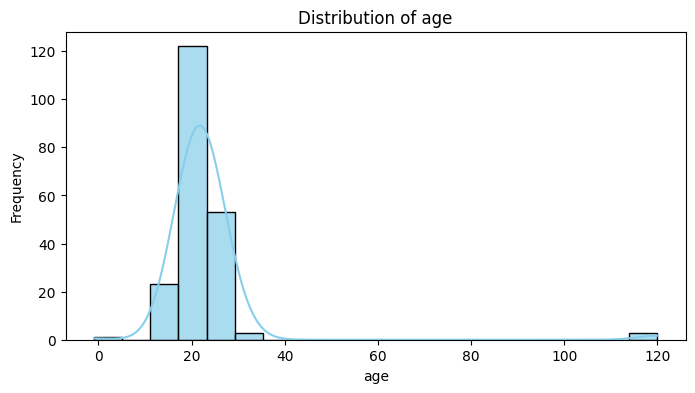

Interpretation: age distribution shows central tendency, skewness, and potential outliers.



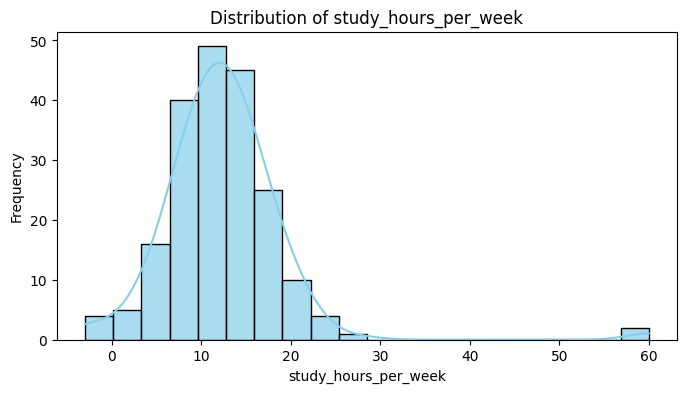

Interpretation: study_hours_per_week distribution shows central tendency, skewness, and potential outliers.



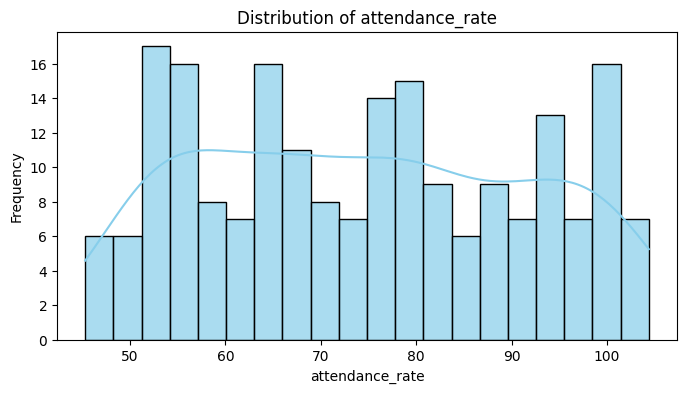

Interpretation: attendance_rate distribution shows central tendency, skewness, and potential outliers.



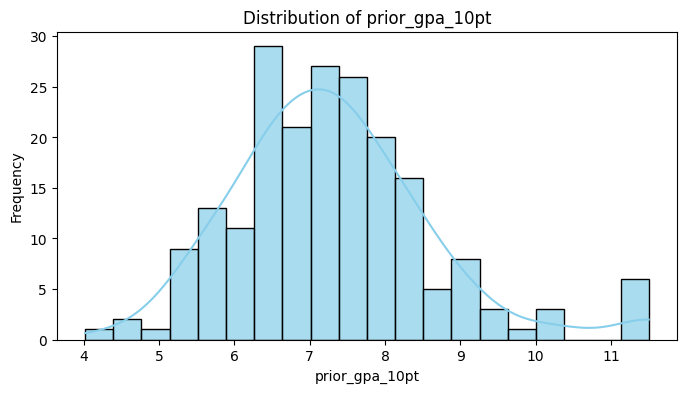

Interpretation: prior_gpa_10pt distribution shows central tendency, skewness, and potential outliers.



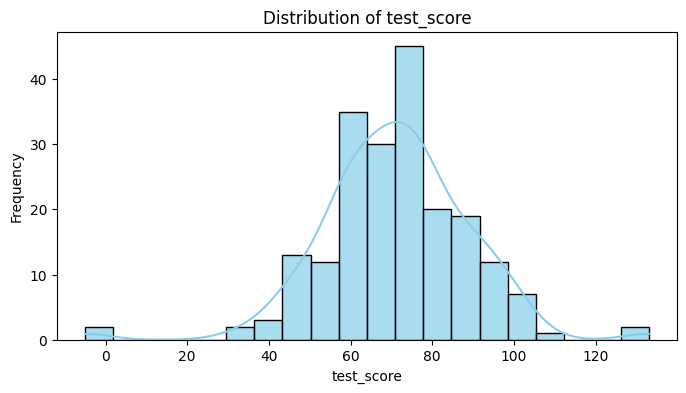

Interpretation: test_score distribution shows central tendency, skewness, and potential outliers.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


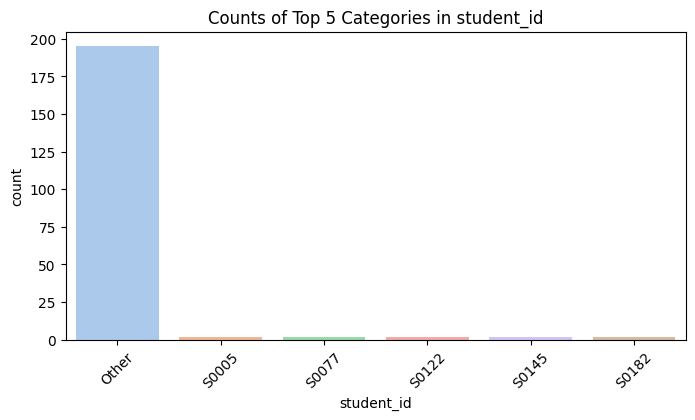

Interpretation: Top 5 categories dominate student_id; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


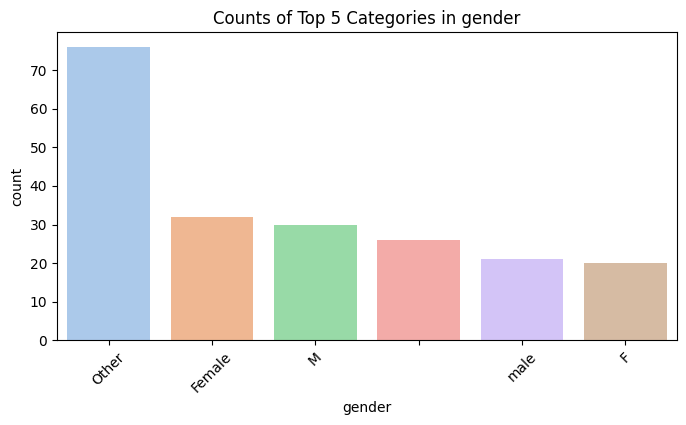

Interpretation: Top 5 categories dominate gender; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


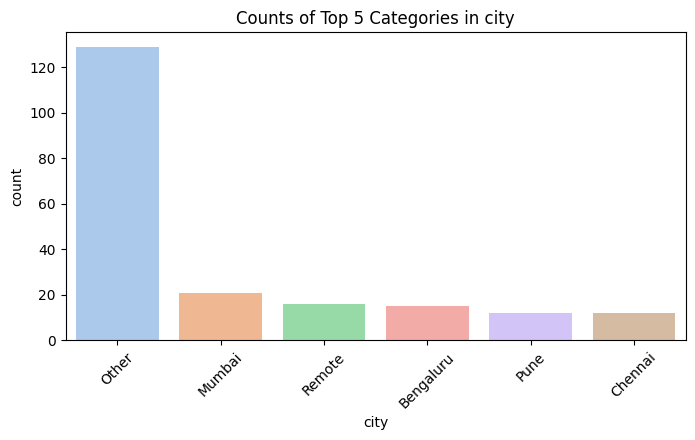

Interpretation: Top 5 categories dominate city; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


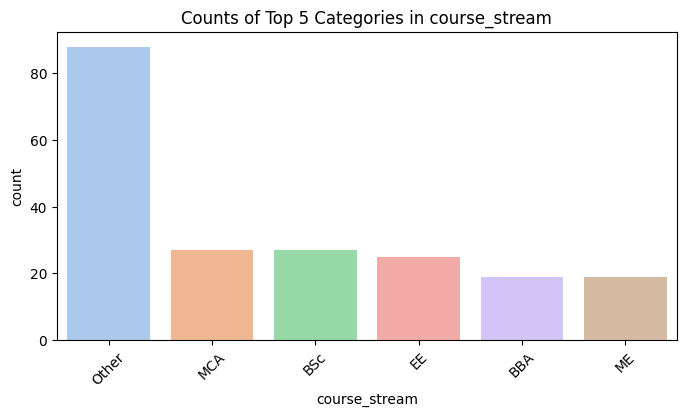

Interpretation: Top 5 categories dominate course_stream; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


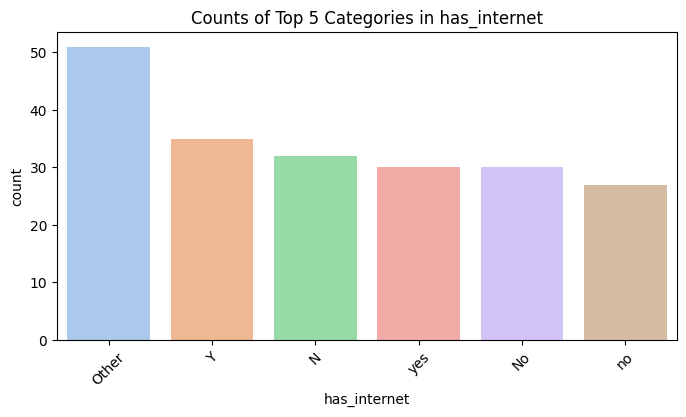

Interpretation: Top 5 categories dominate has_internet; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


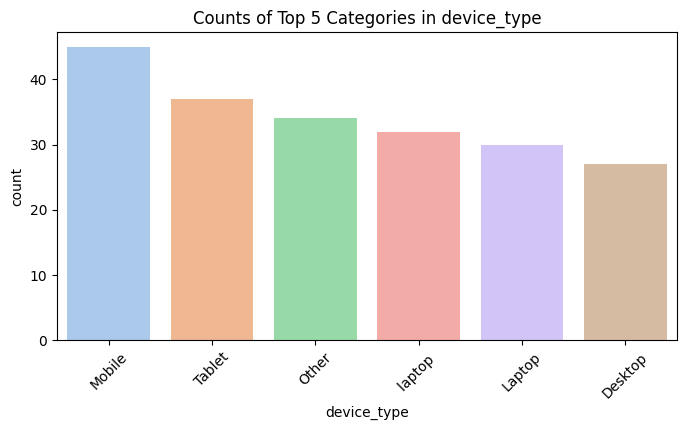

Interpretation: Top 5 categories dominate device_type; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


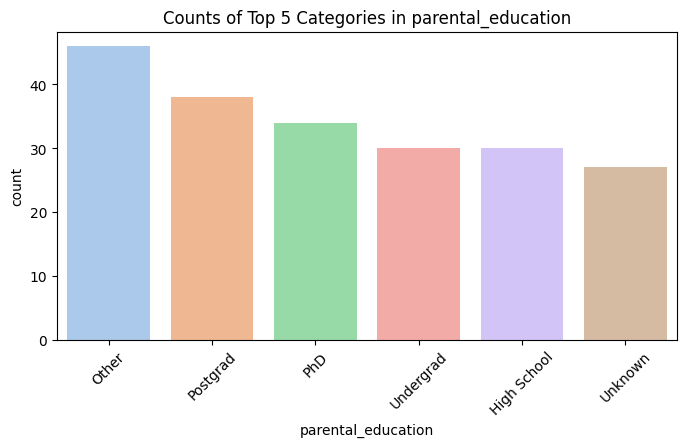

Interpretation: Top 5 categories dominate parental_education; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


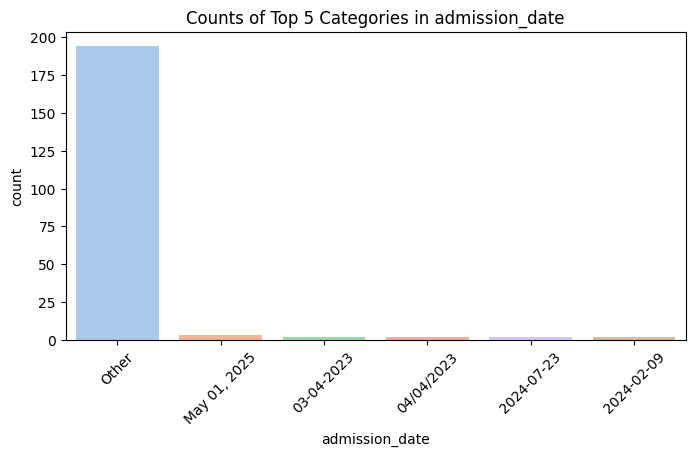

Interpretation: Top 5 categories dominate admission_date; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


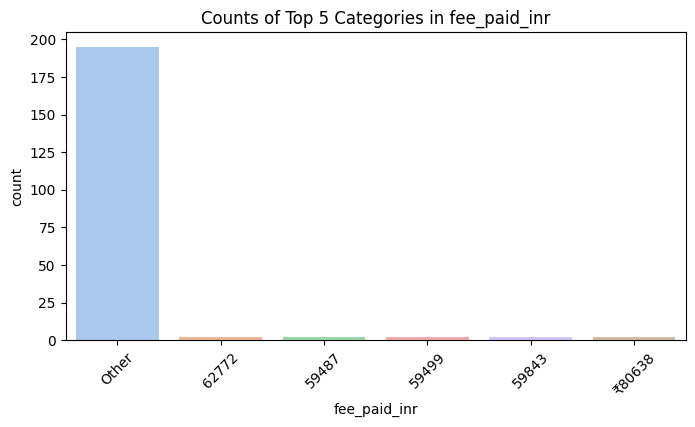

Interpretation: Top 5 categories dominate fee_paid_inr; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


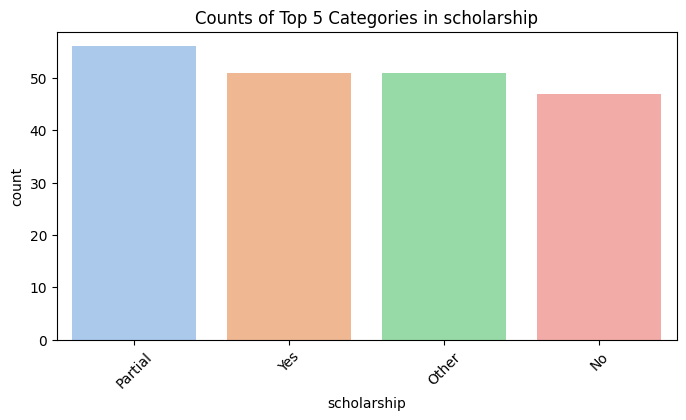

Interpretation: Top 5 categories dominate scholarship; remaining grouped as 'Other'.



/tmp/ipython-input-3145132499.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')


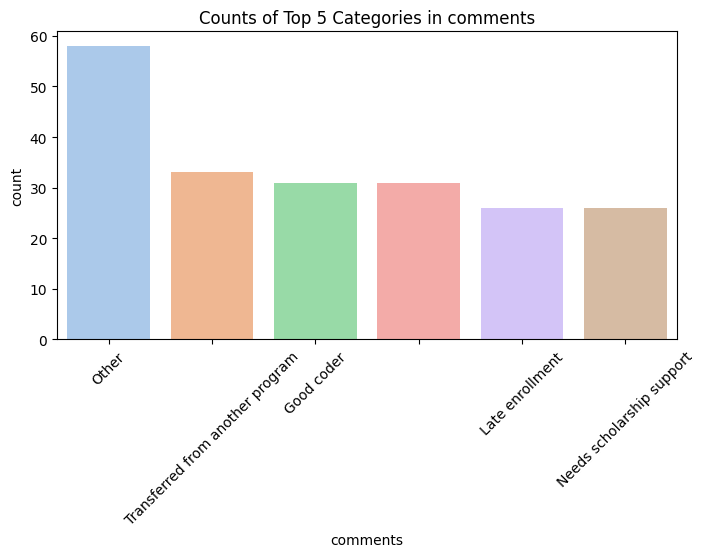

Interpretation: Top 5 categories dominate comments; remaining grouped as 'Other'.



In [ ]:
#part C: Task 3: Exploratory Data Analysis (EDA) & Insights
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files # Keep import in case user wants to re-upload
import pandas as pd

# Load the cleaned dataset
# Check if the expected cleaned file exists, otherwise prompt for upload or re-cleaning
try:
    df = pd.read_csv("cleaned_dataset.csv")
    print("Loaded cleaned_dataset.csv")
except FileNotFoundError:
    print("cleaned_dataset.csv not found. Please run the data cleaning steps first or upload the file.")
    # Optionally, add code here to re-run cleaning or prompt for upload if needed
    # For now, we'll stop to avoid further errors
    raise # Re-raise the error to stop execution if file is missing


df.head()


numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

top_n = 5  # show only top 5 categories

# --- Numeric variables ---
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=20, color='skyblue', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Interpretation: {col} distribution shows central tendency, skewness, and potential outliers.\n")

# --- Categorical variables ---
for col in categorical_cols:
    # Group less frequent categories into 'Other'
    top_categories = df[col].value_counts().nlargest(top_n).index
    df_plot = df[col].apply(lambda x: x if x in top_categories else 'Other')

    plt.figure(figsize=(8,4))
    sns.countplot(x=df_plot, order=df_plot.value_counts().index, palette='pastel')
    plt.title(f'Counts of Top {top_n} Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()
    print(f"Interpretation: Top {top_n} categories dominate {col}; remaining grouped as 'Other'.\n")

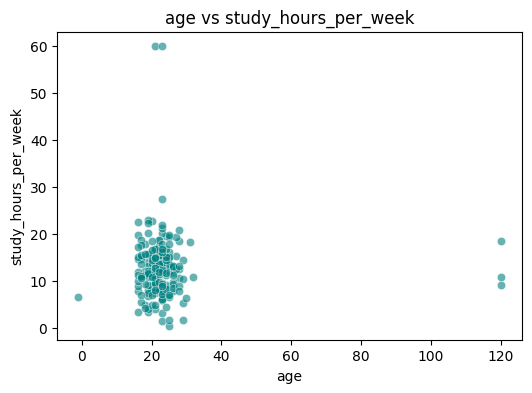

Interpretation: Correlation between age and study_hours_per_week is 0.00. Scatter shows linearity/clusters.



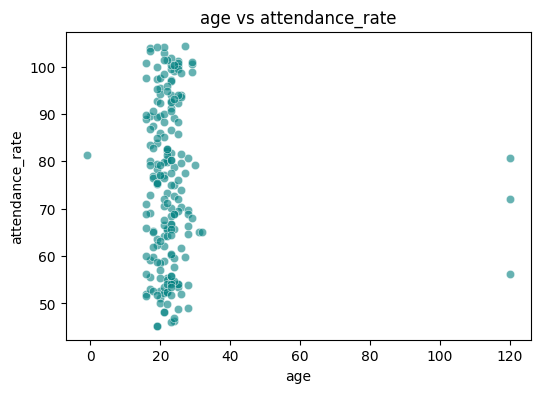

Interpretation: Correlation between age and attendance_rate is -0.03. Scatter shows linearity/clusters.



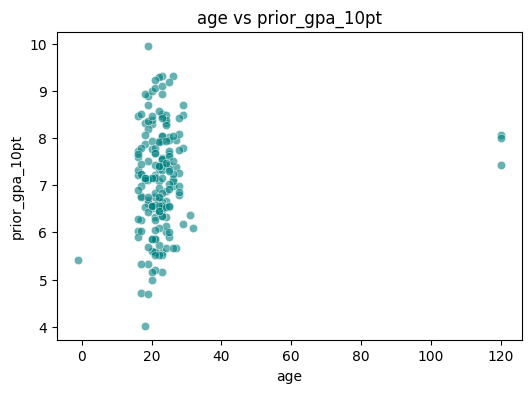

Interpretation: Correlation between age and prior_gpa_10pt is 0.12. Scatter shows linearity/clusters.



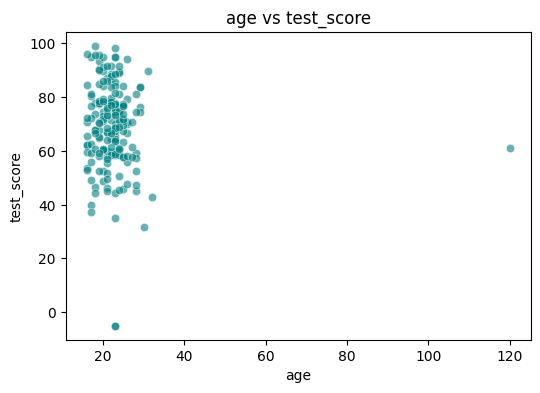

Interpretation: Correlation between age and test_score is -0.07. Scatter shows linearity/clusters.



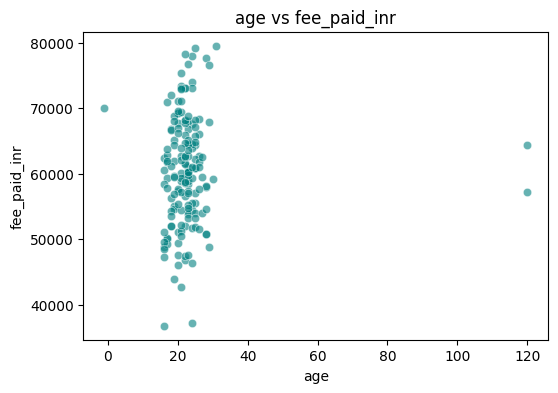

Interpretation: Correlation between age and fee_paid_inr is 0.04. Scatter shows linearity/clusters.



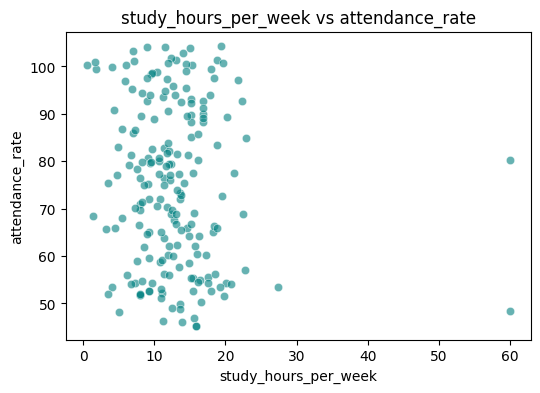

Interpretation: Correlation between study_hours_per_week and attendance_rate is -0.10. Scatter shows linearity/clusters.



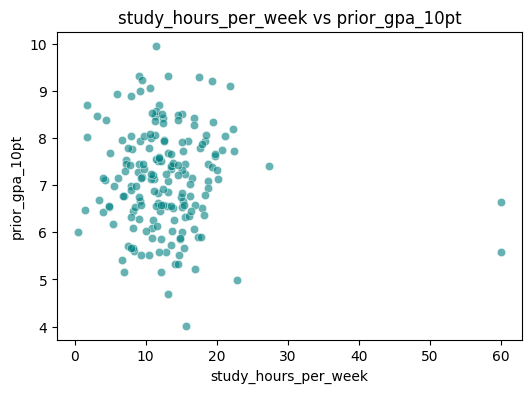

Interpretation: Correlation between study_hours_per_week and prior_gpa_10pt is -0.05. Scatter shows linearity/clusters.



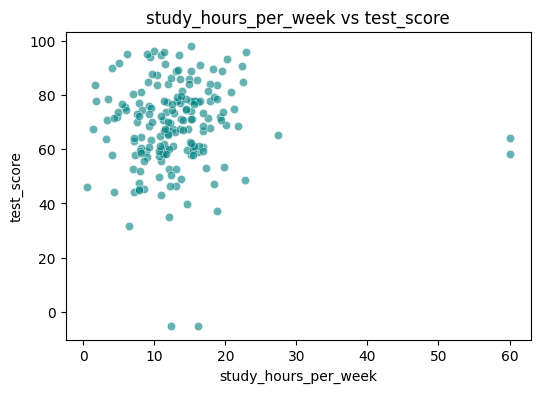

Interpretation: Correlation between study_hours_per_week and test_score is 0.03. Scatter shows linearity/clusters.



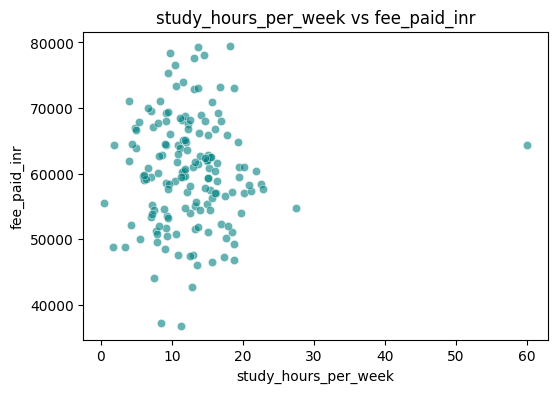

Interpretation: Correlation between study_hours_per_week and fee_paid_inr is 0.02. Scatter shows linearity/clusters.



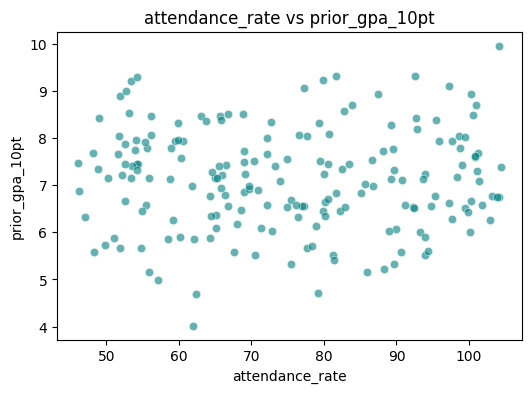

Interpretation: Correlation between attendance_rate and prior_gpa_10pt is 0.01. Scatter shows linearity/clusters.



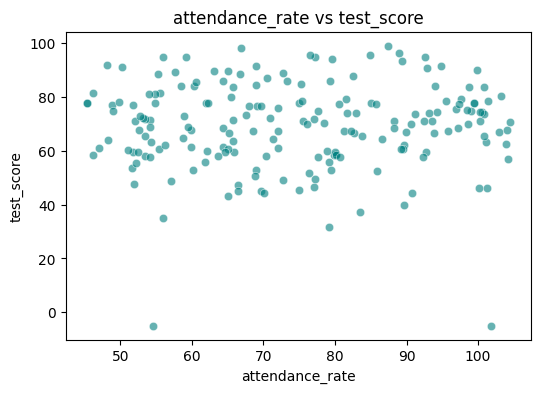

Interpretation: Correlation between attendance_rate and test_score is 0.02. Scatter shows linearity/clusters.



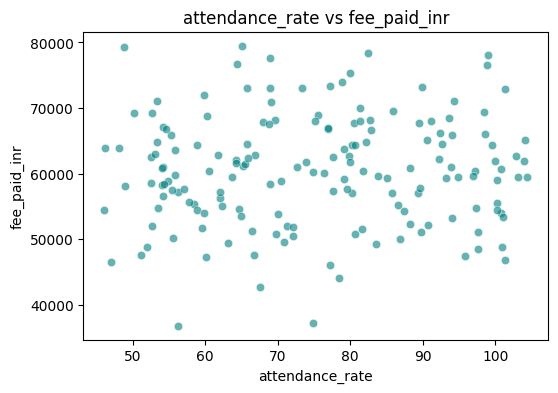

Interpretation: Correlation between attendance_rate and fee_paid_inr is 0.05. Scatter shows linearity/clusters.



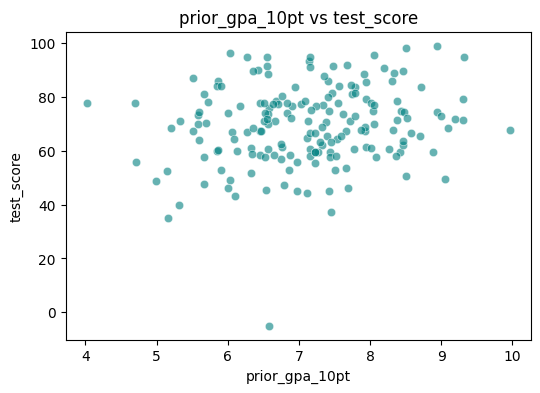

Interpretation: Correlation between prior_gpa_10pt and test_score is 0.17. Scatter shows linearity/clusters.



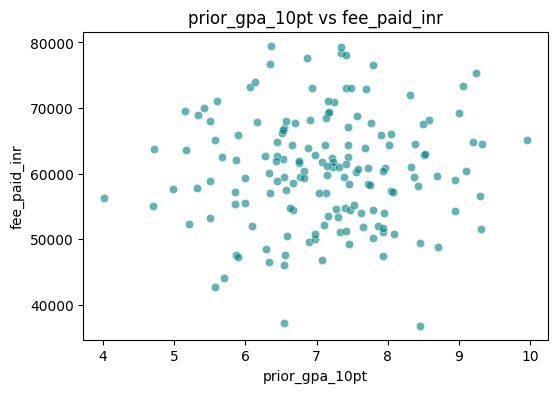

Interpretation: Correlation between prior_gpa_10pt and fee_paid_inr is 0.04. Scatter shows linearity/clusters.



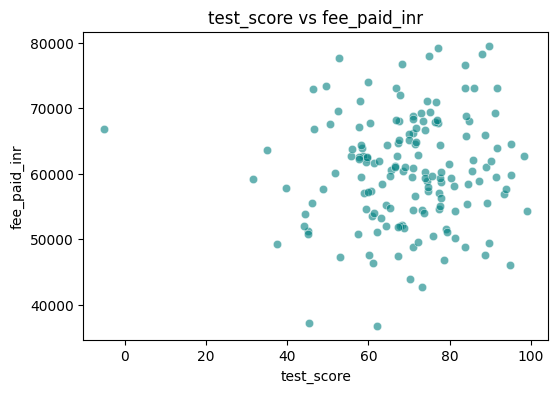

Interpretation: Correlation between test_score and fee_paid_inr is 0.07. Scatter shows linearity/clusters.



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


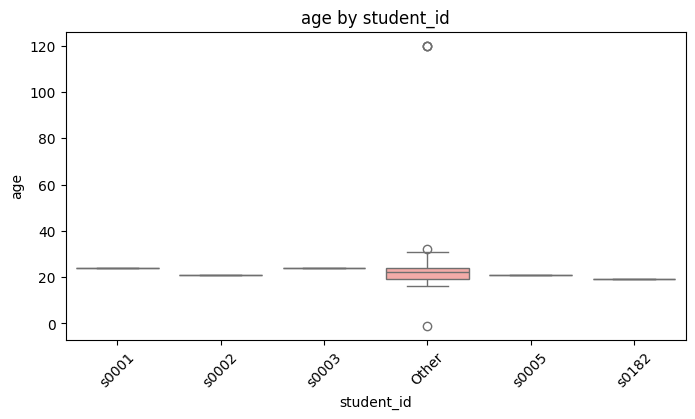

Interpretation: Median age varies across student_id categories: {'s0001': 24.0, 's0002': 21.0, 's0003': 24.0, 's0004': 28.0, 's0005': 21.0, 's0006': 21.0, 's0007': 120.0, 's0008': 25.0, 's0009': 20.0, 's0010': 24.0, 's0011': 20.0, 's0012': 20.0, 's0013': 23.0, 's0014': 16.0, 's0015': 16.0, 's0016': 20.0, 's0017': 18.0, 's0018': 23.0, 's0019': 19.0, 's0020': 17.0, 's0021': 28.0, 's0022': 21.0, 's0023': 22.0, 's0024': 17.0, 's0025': 20.0, 's0026': 22.0, 's0027': 18.0, 's0028': 23.0, 's0029': 120.0, 's0030': 21.0, 's0031': 20.0, 's0032': 29.0, 's0033': 22.0, 's0034': 18.0, 's0035': 25.0, 's0036': 17.0, 's0037': 23.0, 's0038': 16.0, 's0039': 17.0, 's0040': 23.0, 's0041': 25.0, 's0042': 23.0, 's0043': 22.0, 's0044': 21.0, 's0045': 16.0, 's0046': 19.0, 's0047': 20.0, 's0048': 26.0, 's0049': 23.0, 's0050': 16.0, 's0051': 23.0, 's0052': 21.0, 's0053': 19.0, 's0054': 24.0, 's0055': 26.0, 's0056': 26.0, 's0057': 19.0, 's0058': 21.0, 's0059': 23.0, 's0060': 26.0, 's0061': 20.0, 's0062': 21.0, 's0

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


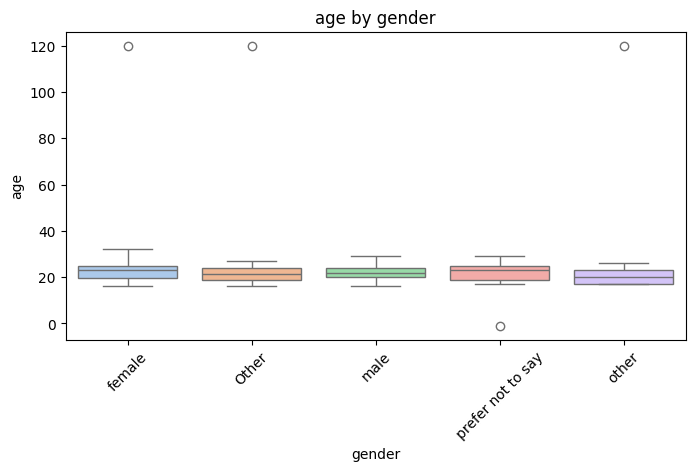

Interpretation: Median age varies across gender categories: {'Missing': 21.5, 'female': 23.0, 'male': 22.0, 'other': 20.0, 'prefer not to say': 23.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


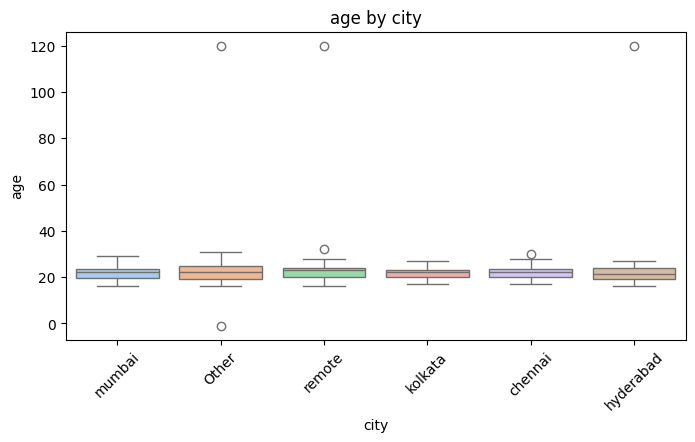

Interpretation: Median age varies across city categories: {'Missing': 24.0, 'bengaluru': 21.0, 'chennai': 22.0, 'delhi': 20.5, 'hyderabad': 21.5, 'kolkata': 22.0, 'mumbai': 22.0, 'pune': 23.0, 'remote': 23.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


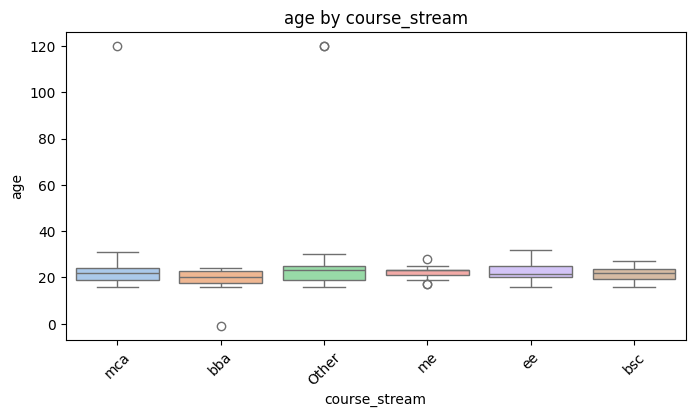

Interpretation: Median age varies across course_stream categories: {'Missing': 23.0, 'bba': 20.0, 'bsc': 22.0, 'cs': 22.0, 'ece': 23.0, 'ee': 21.5, 'mba': 23.0, 'mca': 22.0, 'me': 23.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


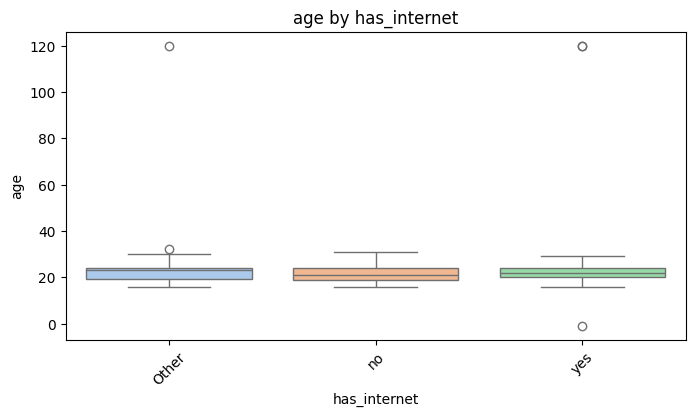

Interpretation: Median age varies across has_internet categories: {'Missing': 23.0, 'no': 21.0, 'yes': 22.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


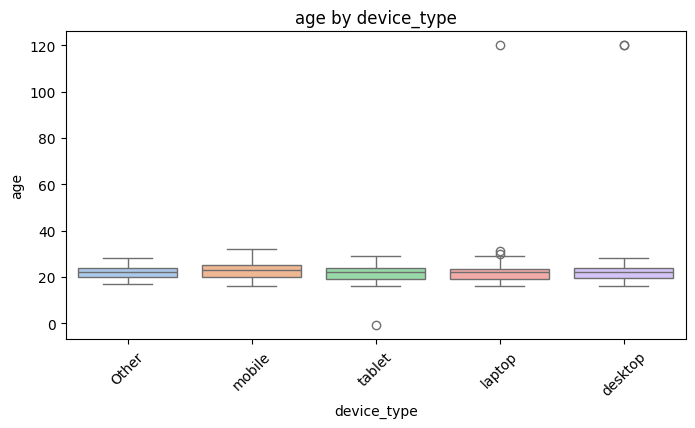

Interpretation: Median age varies across device_type categories: {'Missing': 22.0, 'desktop': 22.0, 'laptop': 22.0, 'mobile': 23.0, 'tablet': 22.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


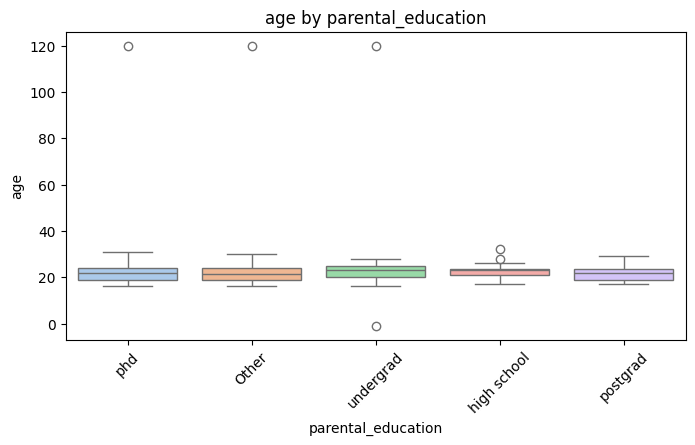

Interpretation: Median age varies across parental_education categories: {'Missing': 21.5, 'high school': 23.0, 'phd': 22.0, 'postgrad': 22.0, 'undergrad': 23.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


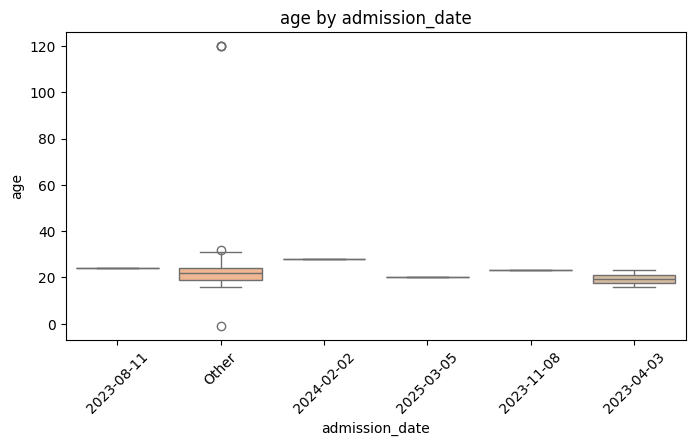

Interpretation: Median age varies across admission_date categories: {'2023-01-04': 25.0, '2023-01-07': -1.0, '2023-04-03': 19.5, '2023-04-06': 29.0, '2023-05-03': 24.0, '2023-06-04': 28.0, '2023-06-05': 17.0, '2023-06-10': 22.0, '2023-07-04': 23.0, '2023-07-09': 17.0, '2023-08-06': 20.0, '2023-08-11': 24.0, '2023-10-05': 23.0, '2023-11-03': 21.0, '2023-11-08': 23.0, '2024-01-02': 23.0, '2024-02-02': 28.0, '2024-02-05': 22.0, '2024-02-08': 22.0, '2024-04-12': 23.0, '2024-08-11': 22.0, '2024-09-04': 23.0, '2024-10-08': 25.0, '2024-12-05': 31.0, '2024-12-08': 21.0, '2025-03-05': 20.0, '2025-06-04': 22.0, 'Missing': 22.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


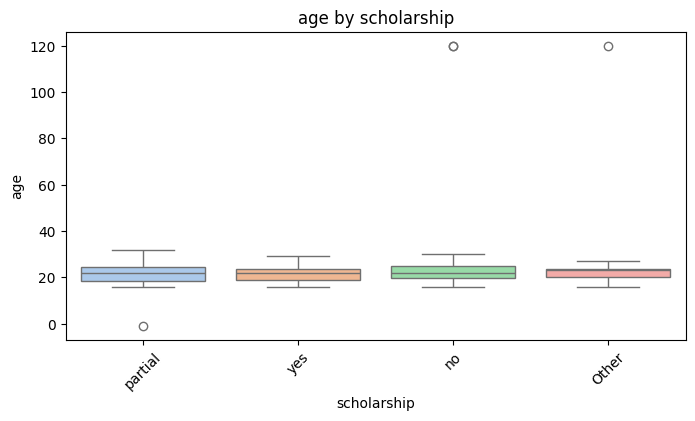

Interpretation: Median age varies across scholarship categories: {'Missing': 23.0, 'no': 22.0, 'partial': 22.0, 'yes': 22.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


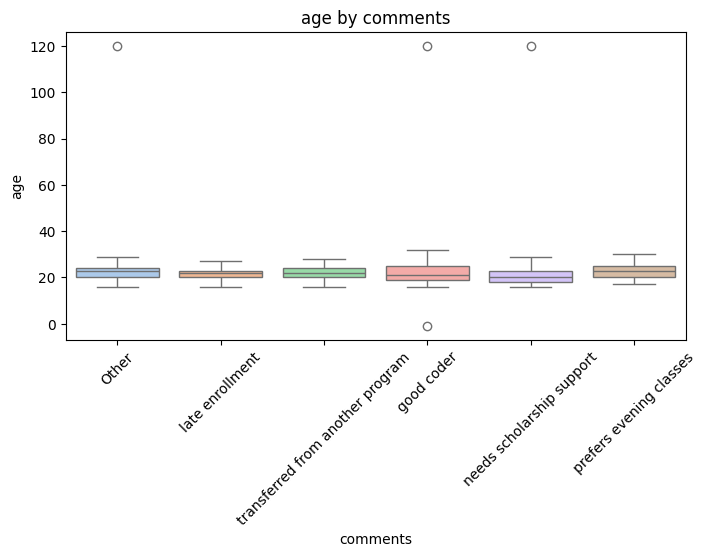

Interpretation: Median age varies across comments categories: {'Missing': 23.0, 'good coder': 21.0, 'late enrollment': 22.0, 'needs scholarship support': 20.0, 'prefers evening classes': 23.0, 'transferred from another program': 22.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


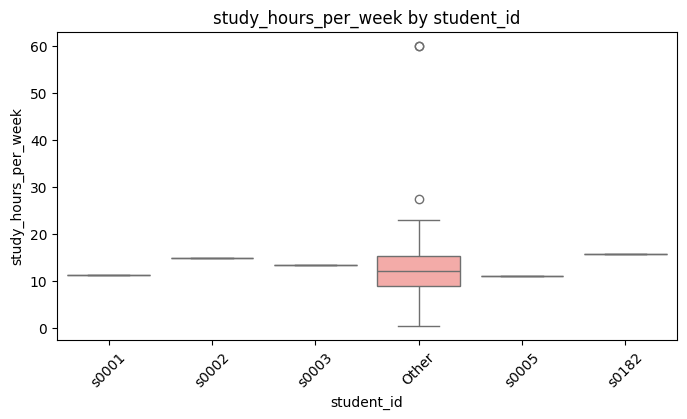

Interpretation: Median study_hours_per_week varies across student_id categories: {'s0001': 11.2, 's0002': 14.9, 's0003': 13.4, 's0004': 8.9, 's0005': 11.0, 's0006': 9.5, 's0007': 9.1, 's0008': 16.2, 's0009': 13.8, 's0010': 8.5, 's0011': 16.5, 's0012': 13.5, 's0013': 16.1, 's0014': 15.1, 's0015': 7.9, 's0016': 9.2, 's0017': 15.7, 's0018': 15.1, 's0019': 11.9, 's0020': nan, 's0021': 18.4, 's0022': 9.0, 's0023': 14.7, 's0024': 11.0, 's0025': 10.9, 's0026': 17.5, 's0027': nan, 's0028': 16.1, 's0029': 18.5, 's0030': 12.1, 's0031': 15.4, 's0032': 10.4, 's0033': 13.6, 's0034': 11.3, 's0035': 12.5, 's0036': 15.0, 's0037': 7.9, 's0038': 22.5, 's0039': 7.0, 's0040': 5.9, 's0041': 17.8, 's0042': 16.0, 's0043': 15.1, 's0044': 15.1, 's0045': 11.9, 's0046': 7.5, 's0047': 12.4, 's0048': 8.6, 's0049': 16.9, 's0050': 11.3, 's0051': nan, 's0052': 10.4, 's0053': 14.1, 's0054': 9.2, 's0055': 7.9, 's0056': 13.2, 's0057': 13.2, 's0058': 9.5, 's0059': 9.6, 's0060': 13.2, 's0061': 4.8, 's0062': 5.0, 's0063': 

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


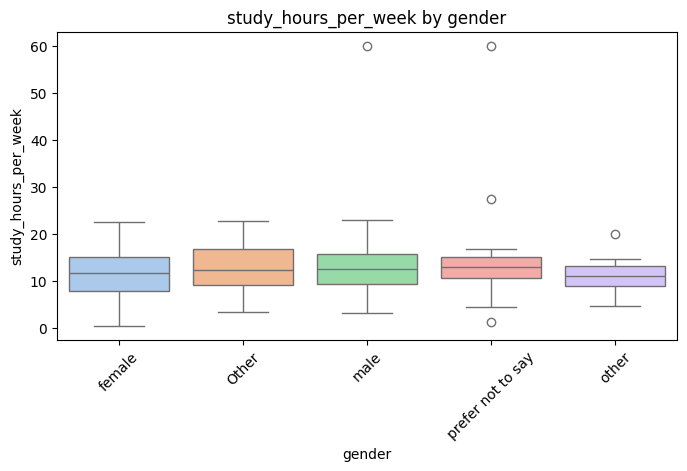

Interpretation: Median study_hours_per_week varies across gender categories: {'Missing': 12.3, 'female': 11.75, 'male': 12.649999999999999, 'other': 11.0, 'prefer not to say': 13.1}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


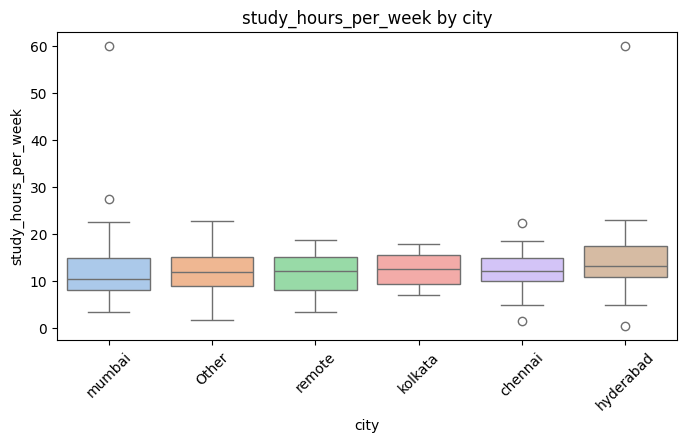

Interpretation: Median study_hours_per_week varies across city categories: {'Missing': 12.85, 'bengaluru': 12.65, 'chennai': 12.05, 'delhi': 12.600000000000001, 'hyderabad': 13.1, 'kolkata': 12.6, 'mumbai': 10.4, 'pune': 11.5, 'remote': 12.149999999999999}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


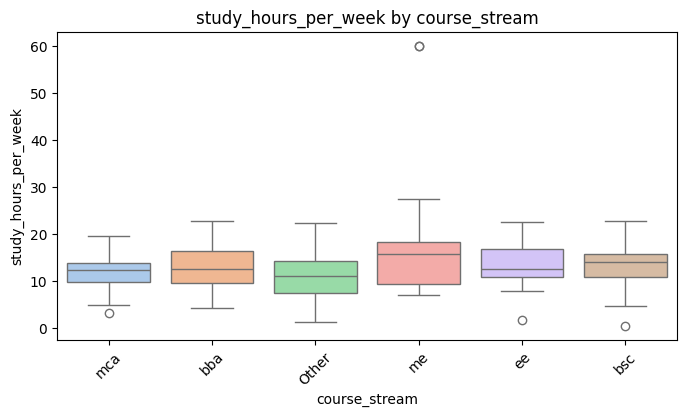

Interpretation: Median study_hours_per_week varies across course_stream categories: {'Missing': 11.9, 'bba': 12.55, 'bsc': 14.0, 'cs': 9.0, 'ece': 11.55, 'ee': 12.65, 'mba': 11.2, 'mca': 12.3, 'me': 15.8}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


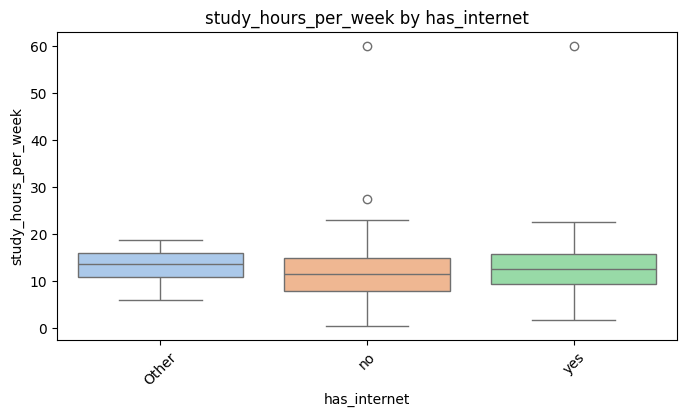

Interpretation: Median study_hours_per_week varies across has_internet categories: {'Missing': 13.6, 'no': 11.6, 'yes': 12.55}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


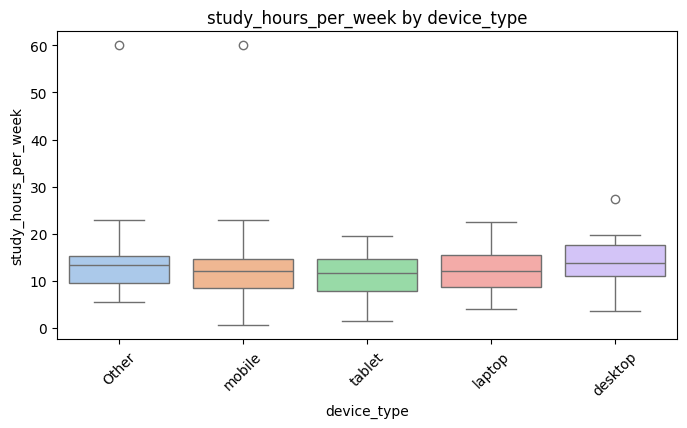

Interpretation: Median study_hours_per_week varies across device_type categories: {'Missing': 13.399999999999999, 'desktop': 13.7, 'laptop': 12.100000000000001, 'mobile': 12.05, 'tablet': 11.600000000000001}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


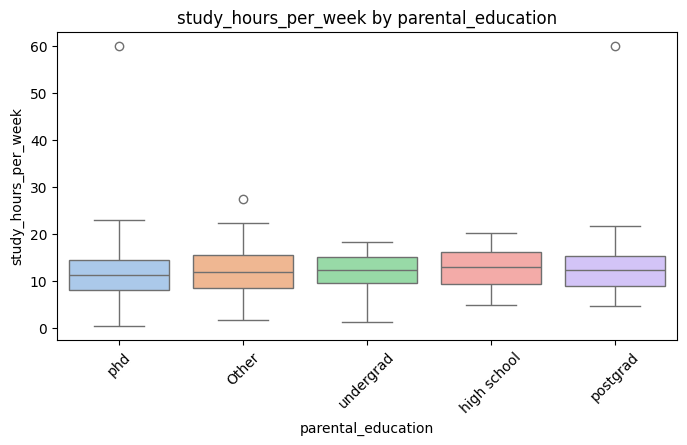

Interpretation: Median study_hours_per_week varies across parental_education categories: {'Missing': 12.0, 'high school': 13.1, 'phd': 11.3, 'postgrad': 12.35, 'undergrad': 12.350000000000001}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


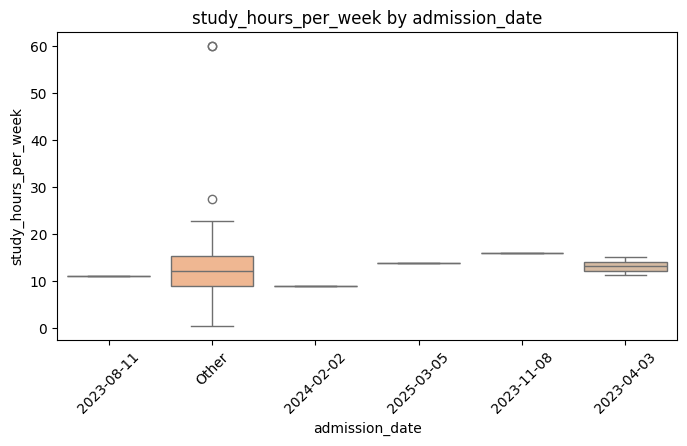

Interpretation: Median study_hours_per_week varies across admission_date categories: {'2023-01-04': 1.8, '2023-01-07': 6.7, '2023-04-03': 13.2, '2023-04-06': 14.5, '2023-05-03': nan, '2023-06-04': 7.9, '2023-06-05': nan, '2023-06-10': 18.8, '2023-07-04': 13.0, '2023-07-09': 15.6, '2023-08-06': 14.5, '2023-08-11': 11.2, '2023-10-05': 5.9, '2023-11-03': 9.3, '2023-11-08': 16.1, '2024-01-02': 27.4, '2024-02-02': 8.9, '2024-02-05': 15.1, '2024-02-08': 8.2, '2024-04-12': 11.9, '2024-08-11': 11.4, '2024-09-04': 9.6, '2024-10-08': 15.2, '2024-12-05': 18.2, '2024-12-08': 16.9, '2025-03-05': 13.8, '2025-06-04': 16.4, 'Missing': 12.1}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


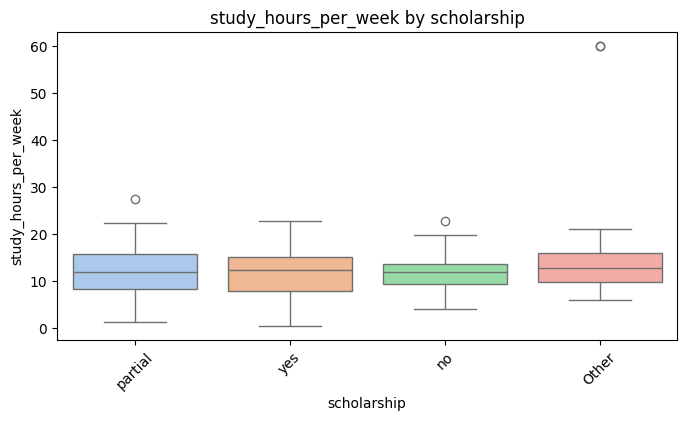

Interpretation: Median study_hours_per_week varies across scholarship categories: {'Missing': 12.8, 'no': 11.9, 'partial': 12.0, 'yes': 12.3}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


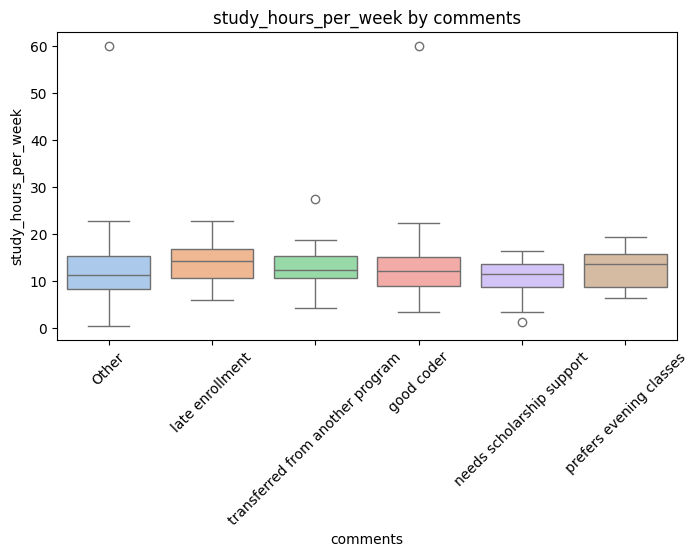

Interpretation: Median study_hours_per_week varies across comments categories: {'Missing': 11.3, 'good coder': 12.1, 'late enrollment': 14.350000000000001, 'needs scholarship support': 11.65, 'prefers evening classes': 13.6, 'transferred from another program': 12.350000000000001}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


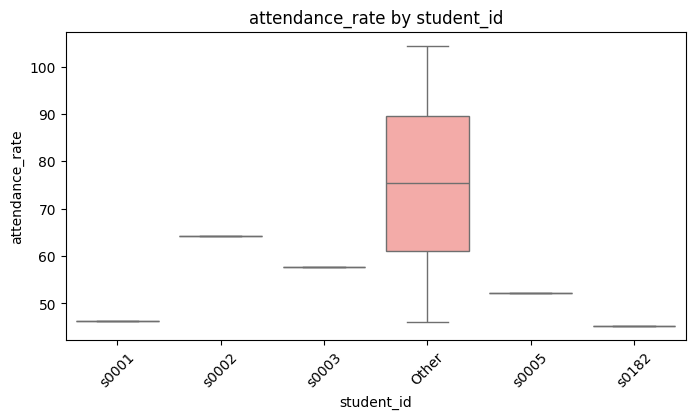

Interpretation: Median attendance_rate varies across student_id categories: {'s0001': 46.2, 's0002': 64.3, 's0003': 57.7, 's0004': 64.6, 's0005': 52.2, 's0006': 98.4, 's0007': 80.6, 's0008': 85.7, 's0009': 92.4, 's0010': 74.9, 's0011': 50.2, 's0012': 77.2, 's0013': 80.2, 's0014': 89.7, 's0015': 70.9, 's0016': 52.7, 's0017': 62.0, 's0018': 66.8, 's0019': 83.8, 's0020': 79.2, 's0021': 66.4, 's0022': 104.2, 's0023': 81.3, 's0024': 59.2, 's0025': 51.1, 's0026': 54.2, 's0027': 59.8, 's0028': 54.6, 's0029': 56.2, 's0030': 62.1, 's0031': 55.4, 's0032': 98.8, 's0033': 49.8, 's0034': 76.5, 's0035': 69.6, 's0036': 103.9, 's0037': 51.7, 's0038': 68.9, 's0039': 103.2, 's0040': 96.9, 's0041': 94.0, 's0042': 60.5, 's0043': 55.3, 's0044': 85.1, 's0045': 100.8, 's0046': 78.4, 's0047': 79.3, 's0048': 61.8, 's0049': 91.2, 's0050': 56.2, 's0051': 64.4, 's0052': 70.5, 's0053': 75.5, 's0054': 59.5, 's0055': 51.9, 's0056': 81.6, 's0057': 62.3, 's0058': 79.9, 's0059': 54.3, 's0060': 73.9, 's0061': 77.0, 's00

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


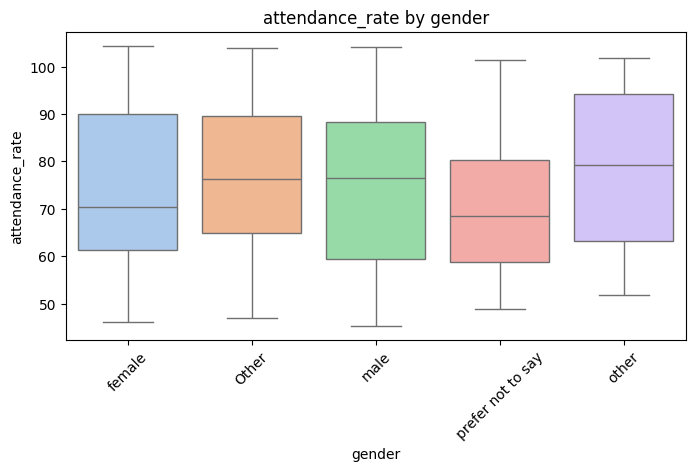

Interpretation: Median attendance_rate varies across gender categories: {'Missing': 76.30000000000001, 'female': 70.3, 'male': 76.4, 'other': 79.2, 'prefer not to say': 68.5}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


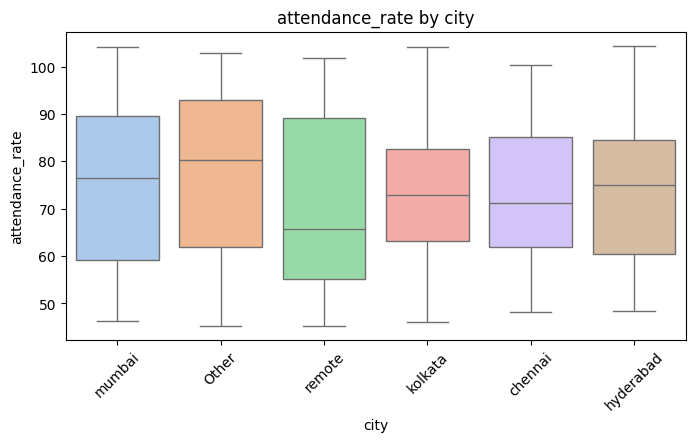

Interpretation: Median attendance_rate varies across city categories: {'Missing': 86.69999999999999, 'bengaluru': 79.25, 'chennai': 71.3, 'delhi': 84.0, 'hyderabad': 75.05000000000001, 'kolkata': 72.8, 'mumbai': 76.4, 'pune': 71.55, 'remote': 65.8}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


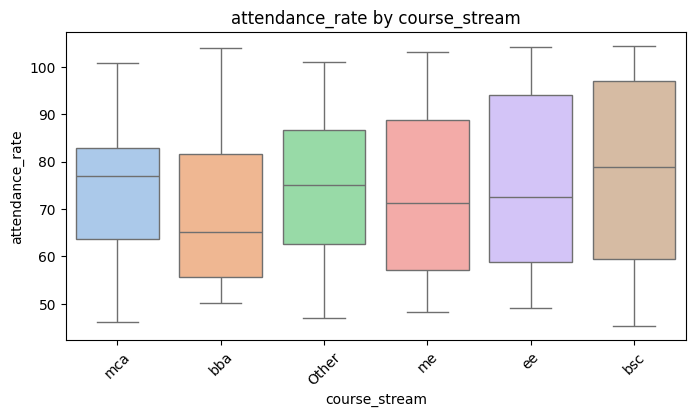

Interpretation: Median attendance_rate varies across course_stream categories: {'Missing': 77.6, 'bba': 65.05, 'bsc': 78.9, 'cs': 80.25, 'ece': 71.25, 'ee': 72.55, 'mba': 66.45, 'mca': 77.0, 'me': 71.3}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


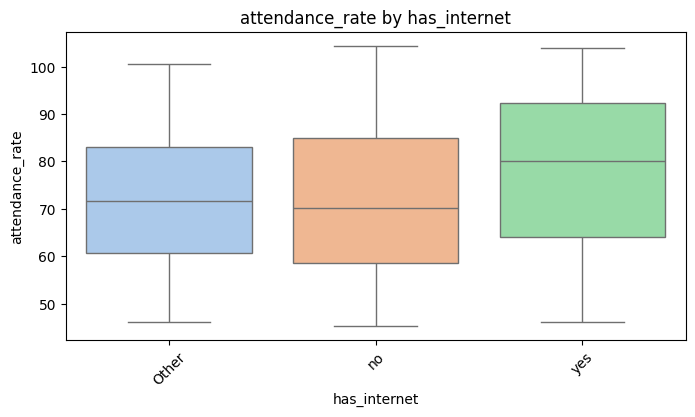

Interpretation: Median attendance_rate varies across has_internet categories: {'Missing': 71.6, 'no': 70.1, 'yes': 80.05000000000001}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


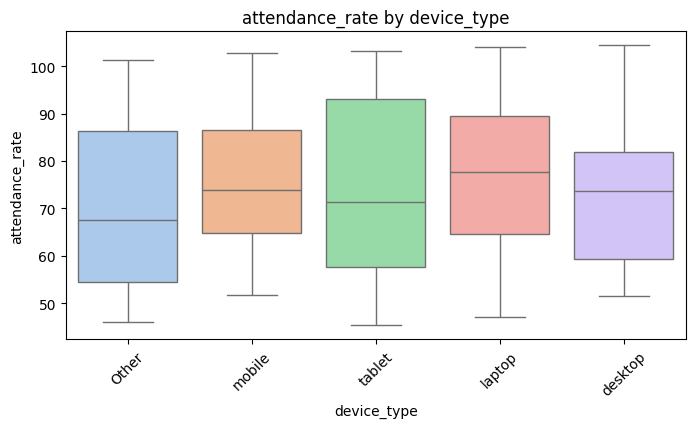

Interpretation: Median attendance_rate varies across device_type categories: {'Missing': 67.65, 'desktop': 73.75, 'laptop': 77.6, 'mobile': 73.85, 'tablet': 71.3}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


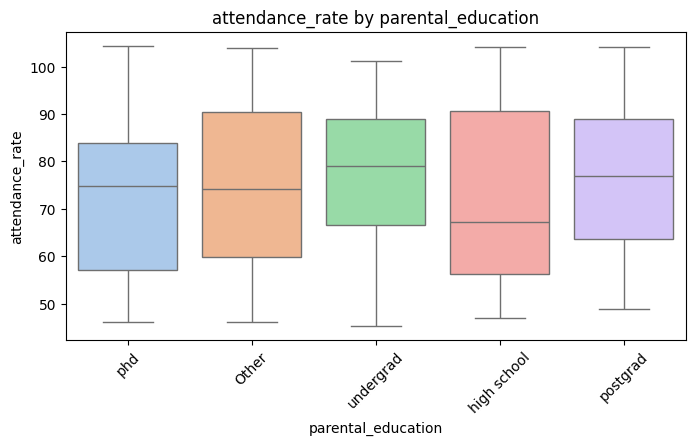

Interpretation: Median attendance_rate varies across parental_education categories: {'Missing': 74.15, 'high school': 67.2, 'phd': 74.9, 'postgrad': 77.0, 'undergrad': 79.1}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


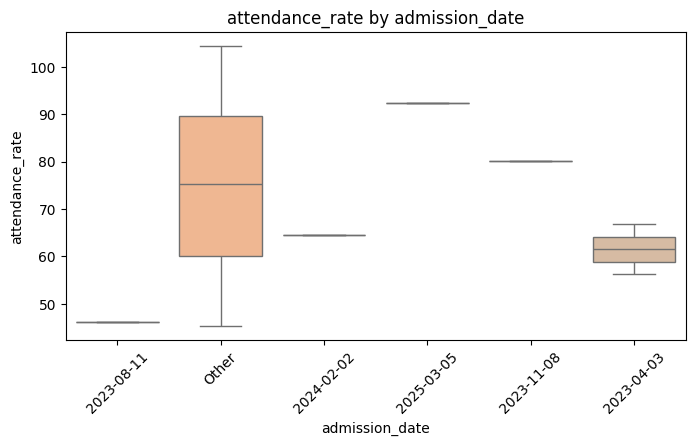

Interpretation: Median attendance_rate varies across admission_date categories: {'2023-01-04': 99.5, '2023-01-07': 81.4, '2023-04-03': 61.5, '2023-04-06': 100.5, '2023-05-03': 68.9, '2023-06-04': 69.7, '2023-06-05': 79.2, '2023-06-10': 101.4, '2023-07-04': 66.7, '2023-07-09': 69.1, '2023-08-06': 95.5, '2023-08-11': 46.2, '2023-10-05': 96.9, '2023-11-03': 72.1, '2023-11-08': 80.2, '2024-01-02': 53.5, '2024-02-02': 64.6, '2024-02-05': 55.3, '2024-02-08': 71.3, '2024-04-12': 90.6, '2024-08-11': 82.7, '2024-09-04': 54.3, '2024-10-08': 88.2, '2024-12-05': 65.1, '2024-12-08': 88.3, '2025-03-05': 92.4, '2025-06-04': 54.9, 'Missing': 75.2}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


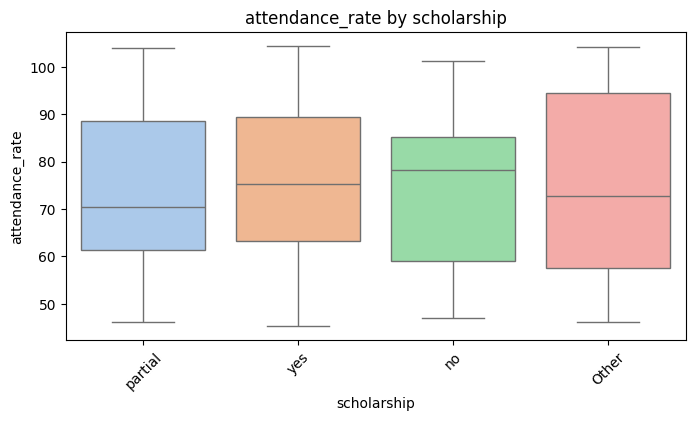

Interpretation: Median attendance_rate varies across scholarship categories: {'Missing': 72.7, 'no': 78.2, 'partial': 70.4, 'yes': 75.2}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


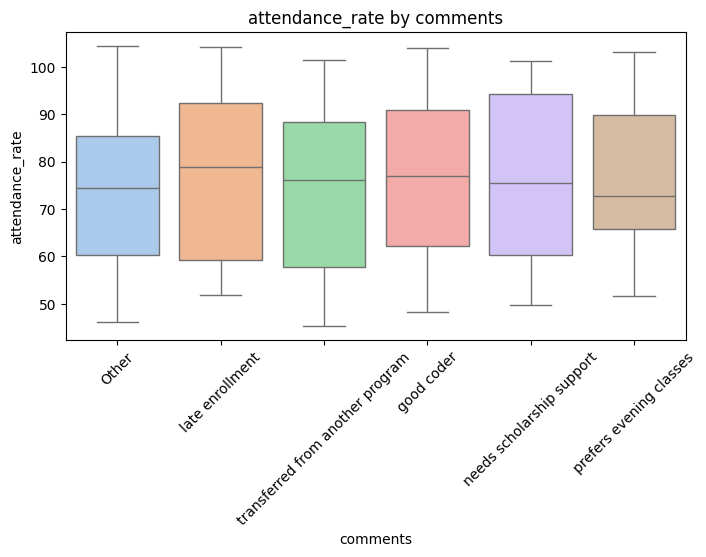

Interpretation: Median attendance_rate varies across comments categories: {'Missing': 74.4, 'good coder': 77.0, 'late enrollment': 78.9, 'needs scholarship support': 75.4, 'prefers evening classes': 72.7, 'transferred from another program': 76.1}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


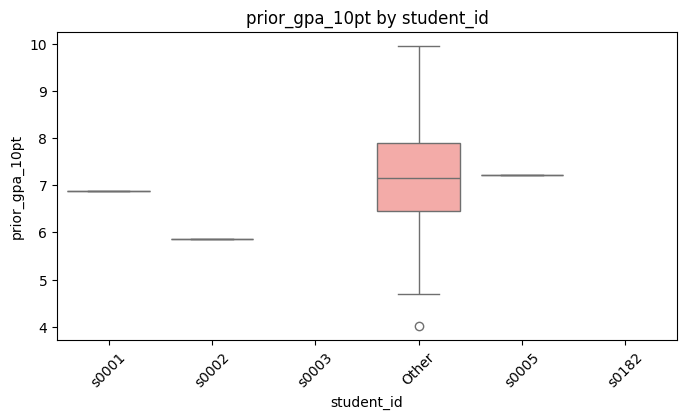

Interpretation: Median prior_gpa_10pt varies across student_id categories: {'s0001': 6.88, 's0002': 5.87, 's0003': nan, 's0004': 7.27, 's0005': 7.22, 's0006': 7.17, 's0007': 7.44, 's0008': 7.03, 's0009': 6.51, 's0010': 6.54, 's0011': 7.16, 's0012': 6.55, 's0013': 6.34, 's0014': 7.33, 's0015': 6.89, 's0016': 9.0, 's0017': 4.02, 's0018': 8.51, 's0019': 8.7, 's0020': 4.71, 's0021': 6.79, 's0022': 6.75, 's0023': 5.51, 's0024': 6.27, 's0025': 5.87, 's0026': 9.3, 's0027': 8.32, 's0028': nan, 's0029': 8.07, 's0030': 5.85, 's0031': 6.57, 's0032': 7.79, 's0033': 5.73, 's0034': 8.06, 's0035': 6.91, 's0036': 6.75, 's0037': 8.05, 's0038': 7.73, 's0039': 6.77, 's0040': nan, 's0041': 5.9, 's0042': 7.94, 's0043': 7.91, 's0044': 6.83, 's0045': 7.59, 's0046': 5.7, 's0047': 8.31, 's0048': 6.98, 's0049': 6.57, 's0050': 8.46, 's0051': 6.35, 's0052': 5.51, 's0053': 5.33, 's0054': 7.93, 's0055': 5.66, 's0056': 9.31, 's0057': 4.7, 's0058': 9.24, 's0059': 7.45, 's0060': 7.08, 's0061': 6.55, 's0062': 7.68, 's0

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


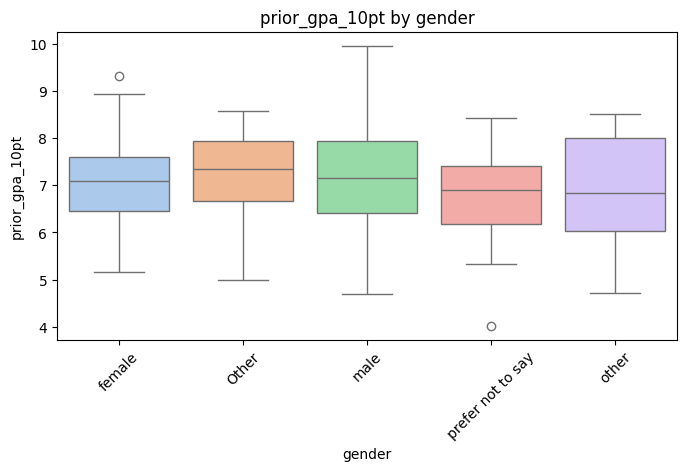

Interpretation: Median prior_gpa_10pt varies across gender categories: {'Missing': 7.35, 'female': 7.095000000000001, 'male': 7.165, 'other': 6.83, 'prefer not to say': 6.91}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


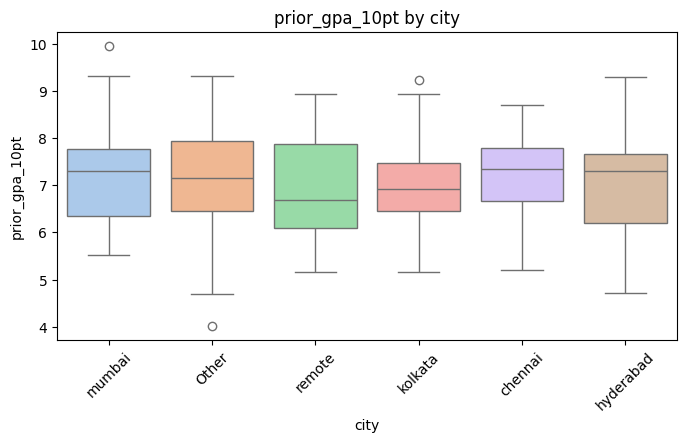

Interpretation: Median prior_gpa_10pt varies across city categories: {'Missing': 7.13, 'bengaluru': 7.16, 'chennai': 7.34, 'delhi': 7.109999999999999, 'hyderabad': 7.305, 'kolkata': 6.91, 'mumbai': 7.3, 'pune': 7.300000000000001, 'remote': 6.68}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


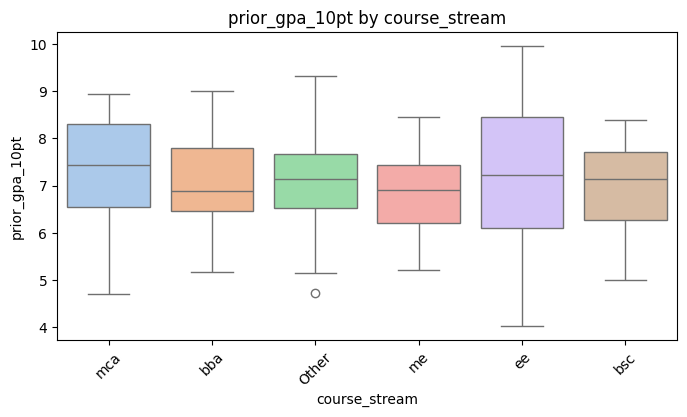

Interpretation: Median prior_gpa_10pt varies across course_stream categories: {'Missing': 7.08, 'bba': 6.89, 'bsc': 7.13, 'cs': 6.6899999999999995, 'ece': 7.52, 'ee': 7.225, 'mba': 6.865, 'mca': 7.44, 'me': 6.9}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


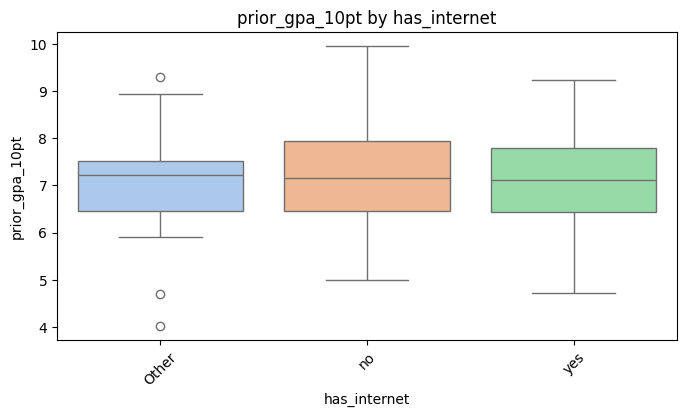

Interpretation: Median prior_gpa_10pt varies across has_internet categories: {'Missing': 7.22, 'no': 7.155, 'yes': 7.105}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


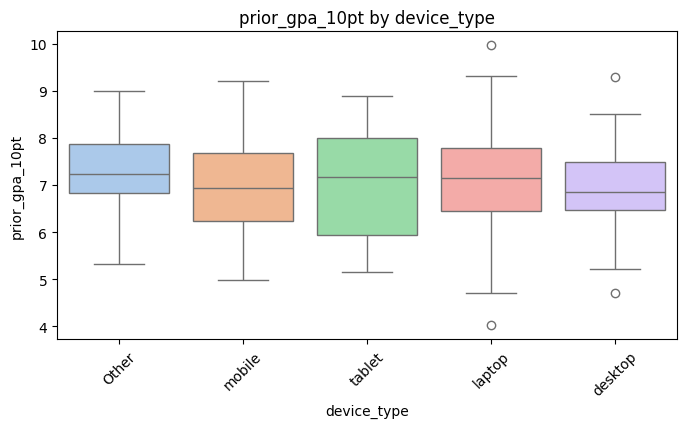

Interpretation: Median prior_gpa_10pt varies across device_type categories: {'Missing': 7.23, 'desktop': 6.845000000000001, 'laptop': 7.15, 'mobile': 6.945, 'tablet': 7.17}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


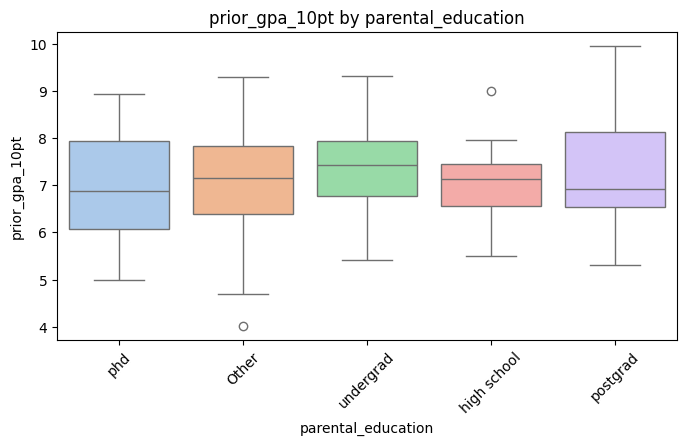

Interpretation: Median prior_gpa_10pt varies across parental_education categories: {'Missing': 7.155, 'high school': 7.14, 'phd': 6.885, 'postgrad': 6.925000000000001, 'undergrad': 7.425000000000001}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


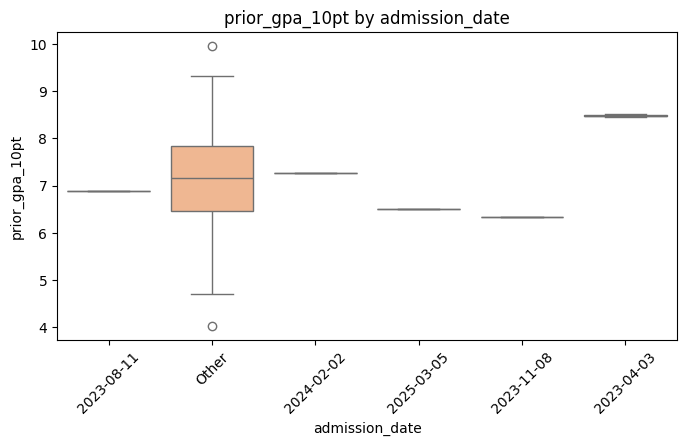

Interpretation: Median prior_gpa_10pt varies across admission_date categories: {'2023-01-04': 8.02, '2023-01-07': 5.42, '2023-04-03': 8.485, '2023-04-06': 8.48, '2023-05-03': 7.48, '2023-06-04': 6.98, '2023-06-05': 4.71, '2023-06-10': 7.08, '2023-07-04': 6.56, '2023-07-09': 7.24, '2023-08-06': 8.38, '2023-08-11': 6.88, '2023-10-05': nan, '2023-11-03': 6.58, '2023-11-08': 6.34, '2024-01-02': 7.4, '2024-02-02': 7.27, '2024-02-05': 7.91, '2024-02-08': 6.09, '2024-04-12': 5.58, '2024-08-11': 8.58, '2024-09-04': 7.45, '2024-10-08': 7.72, '2024-12-05': 6.36, '2024-12-08': 5.21, '2025-03-05': 6.51, '2025-06-04': 6.45, 'Missing': 7.155}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


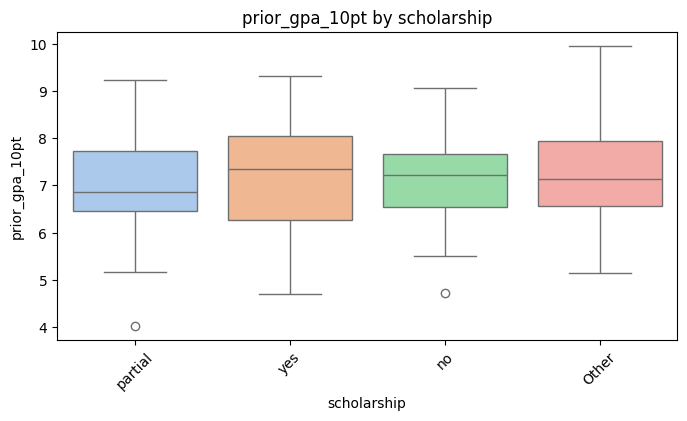

Interpretation: Median prior_gpa_10pt varies across scholarship categories: {'Missing': 7.145, 'no': 7.225, 'partial': 6.86, 'yes': 7.34}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


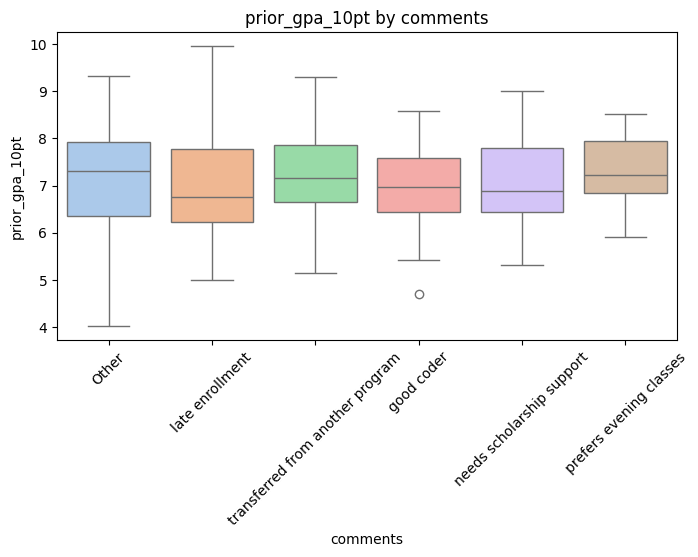

Interpretation: Median prior_gpa_10pt varies across comments categories: {'Missing': 7.3, 'good coder': 6.98, 'late enrollment': 6.755, 'needs scholarship support': 6.89, 'prefers evening classes': 7.235, 'transferred from another program': 7.155}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


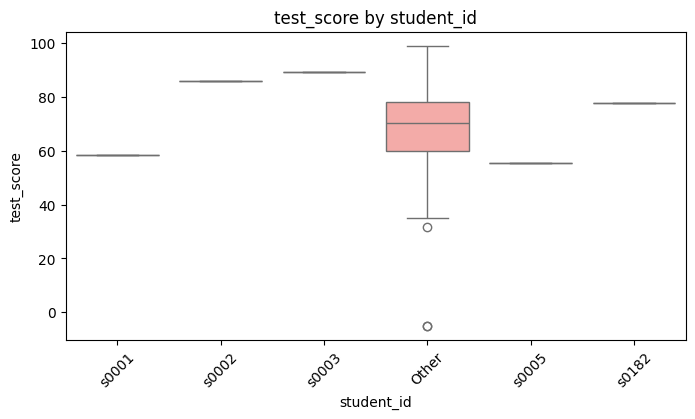

Interpretation: Median test_score varies across student_id categories: {'s0001': 58.4, 's0002': 85.8, 's0003': 89.3, 's0004': 59.4, 's0005': 55.5, 's0006': 75.1, 's0007': nan, 's0008': 77.5, 's0009': 71.0, 's0010': 45.3, 's0011': 91.2, 's0012': 94.9, 's0013': 58.8, 's0014': 62.2, 's0015': 72.3, 's0016': 73.0, 's0017': 77.9, 's0018': 98.2, 's0019': 65.3, 's0020': 56.0, 's0021': 47.3, 's0022': 57.0, 's0023': 67.5, 's0024': 94.9, 's0025': 60.2, 's0026': 71.4, 's0027': 67.8, 's0028': -5.0, 's0029': nan, 's0030': 60.0, 's0031': 60.7, 's0032': 83.7, 's0033': 78.2, 's0034': 95.7, 's0035': 76.8, 's0036': 62.6, 's0037': 76.9, 's0038': 84.6, 's0039': 80.3, 's0040': 75.6, 's0041': 84.0, 's0042': 85.5, 's0043': 88.7, 's0044': 77.7, 's0045': 65.5, 's0046': 70.2, 's0047': 86.1, 's0048': 55.7, 's0049': 73.5, 's0050': 62.1, 's0051': 68.4, 's0052': 87.2, 's0053': 70.9, 's0054': 68.7, 's0055': 47.6, 's0056': 79.2, 's0057': 77.7, 's0058': nan, 's0059': 63.4, 's0060': nan, 's0061': 71.7, 's0062': 91.7, 's

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


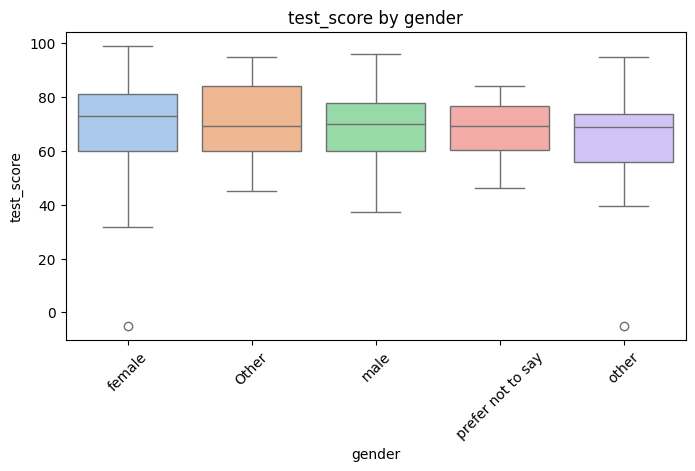

Interpretation: Median test_score varies across gender categories: {'Missing': 69.4, 'female': 73.1, 'male': 70.1, 'other': 68.9, 'prefer not to say': 69.1}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


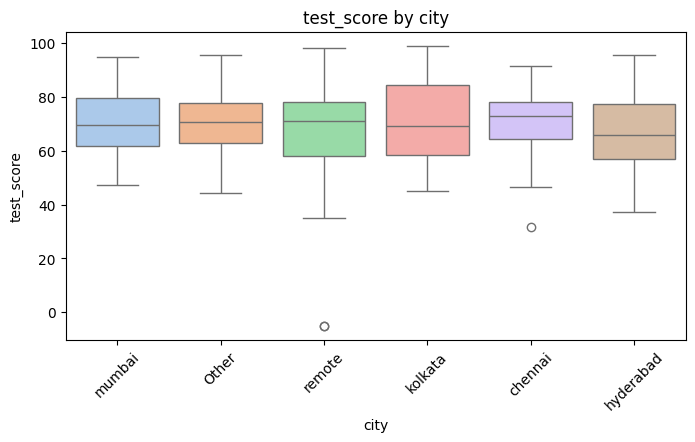

Interpretation: Median test_score varies across city categories: {'Missing': 72.65, 'bengaluru': 67.65, 'chennai': 73.1, 'delhi': 73.9, 'hyderabad': 65.75, 'kolkata': 69.2, 'mumbai': 69.55000000000001, 'pune': 71.4, 'remote': 71.2}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


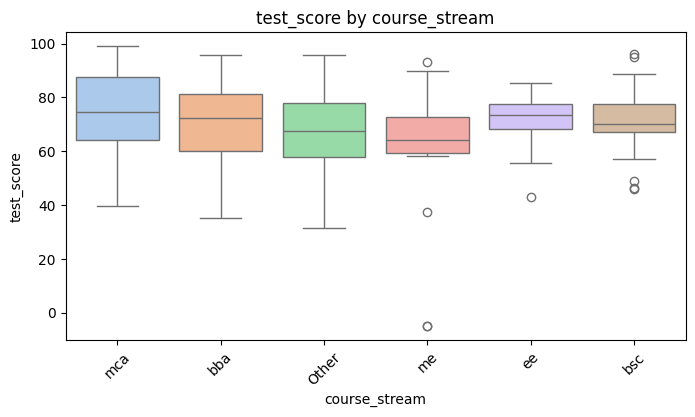

Interpretation: Median test_score varies across course_stream categories: {'Missing': 61.2, 'bba': 72.3, 'bsc': 70.2, 'cs': 74.5, 'ece': 76.85, 'ee': 73.3, 'mba': 71.0, 'mca': 74.4, 'me': 64.25}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


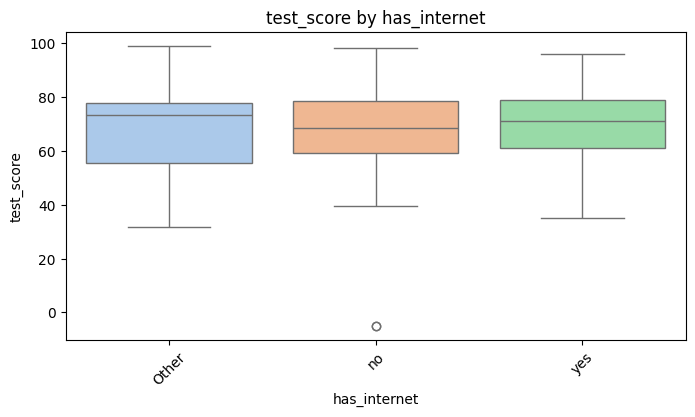

Interpretation: Median test_score varies across has_internet categories: {'Missing': 73.5, 'no': 68.7, 'yes': 71.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


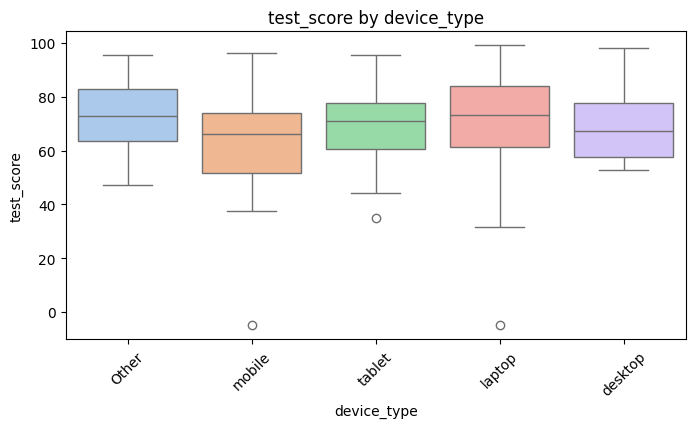

Interpretation: Median test_score varies across device_type categories: {'Missing': 73.0, 'desktop': 67.4, 'laptop': 73.3, 'mobile': 66.0, 'tablet': 70.9}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


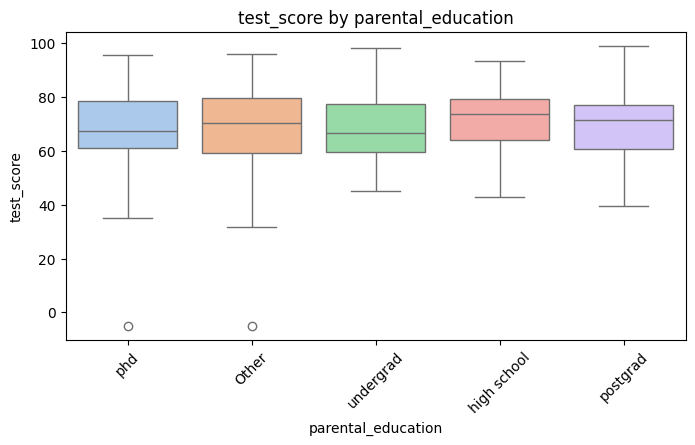

Interpretation: Median test_score varies across parental_education categories: {'Missing': 70.45, 'high school': 73.6, 'phd': 67.5, 'postgrad': 71.35, 'undergrad': 66.7}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


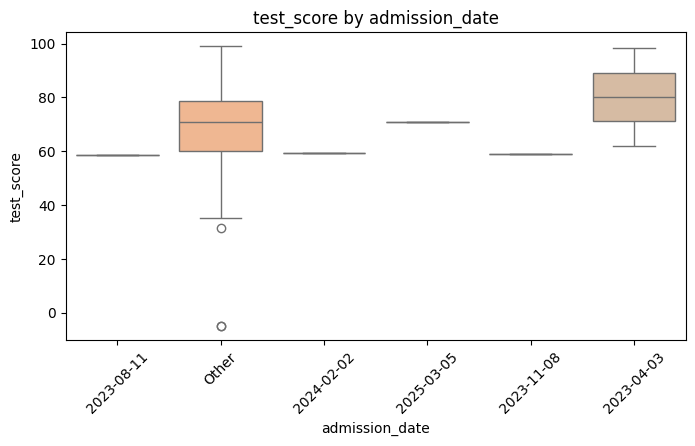

Interpretation: Median test_score varies across admission_date categories: {'2023-01-04': 77.6, '2023-01-07': nan, '2023-04-03': 80.15, '2023-04-06': 74.4, '2023-05-03': 91.6, '2023-06-04': 45.2, '2023-06-05': 56.0, '2023-06-10': 78.6, '2023-07-04': 88.7, '2023-07-09': 76.6, '2023-08-06': 78.6, '2023-08-11': 58.4, '2023-10-05': 75.6, '2023-11-03': 75.8, '2023-11-08': 58.8, '2024-01-02': 65.4, '2024-02-02': 59.4, '2024-02-05': 88.7, '2024-02-08': 64.4, '2024-04-12': 70.0, '2024-08-11': 66.7, '2024-09-04': 63.4, '2024-10-08': 71.1, '2024-12-05': 89.6, '2024-12-08': 68.4, '2025-03-05': 71.0, '2025-06-04': 77.8, 'Missing': 70.2}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


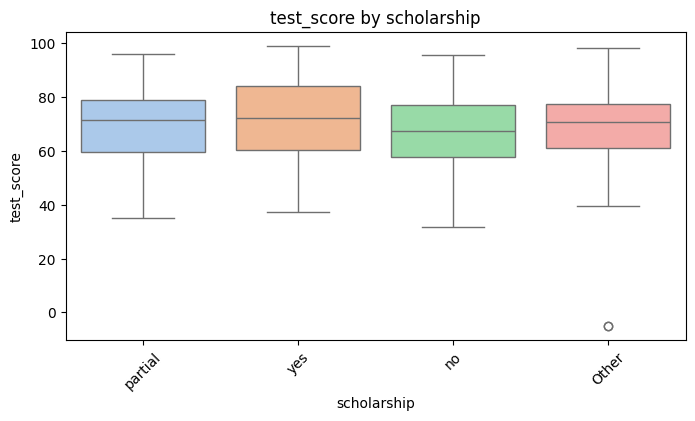

Interpretation: Median test_score varies across scholarship categories: {'Missing': 70.9, 'no': 67.4, 'partial': 71.4, 'yes': 72.45}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


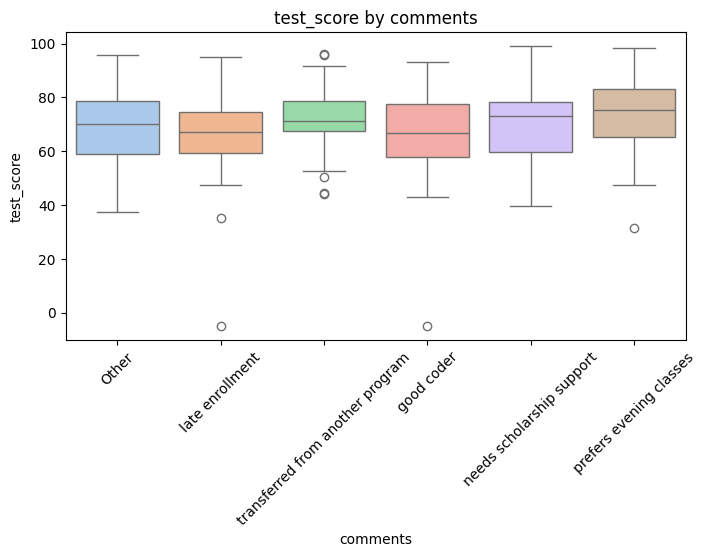

Interpretation: Median test_score varies across comments categories: {'Missing': 70.2, 'good coder': 66.7, 'late enrollment': 67.19999999999999, 'needs scholarship support': 73.0, 'prefers evening classes': 75.5, 'transferred from another program': 71.4}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


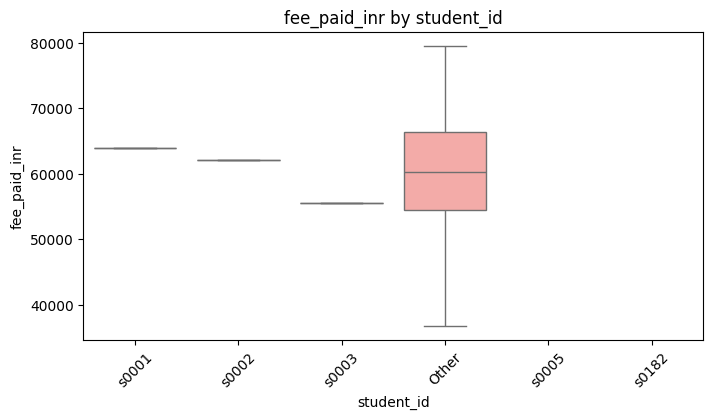

Interpretation: Median fee_paid_inr varies across student_id categories: {'s0001': 63952.0, 's0002': 62085.0, 's0003': 55598.0, 's0004': 54627.0, 's0005': nan, 's0006': 69382.0, 's0007': 64349.0, 's0008': 57035.0, 's0009': 66174.0, 's0010': 37212.0, 's0011': 69190.0, 's0012': 46082.0, 's0013': 57100.0, 's0014': 51043.0, 's0015': 49643.0, 's0016': 69287.0, 's0017': 56258.0, 's0018': 62772.0, 's0019': 59625.0, 's0020': 63816.0, 's0021': nan, 's0022': nan, 's0023': 67970.0, 's0024': nan, 's0025': 47547.0, 's0026': 56575.0, 's0027': 72006.0, 's0028': 66802.0, 's0029': 57211.0, 's0030': 57206.0, 's0031': 57427.0, 's0032': 76614.0, 's0033': nan, 's0034': nan, 's0035': 68242.0, 's0036': 61910.0, 's0037': nan, 's0038': 58429.0, 's0039': 59427.0, 's0040': 59702.0, 's0041': 65821.0, 's0042': 60416.0, 's0043': 65861.0, 's0044': 59354.0, 's0045': 60629.0, 's0046': 44014.0, 's0047': nan, 's0048': 62772.0, 's0049': 67984.0, 's0050': 36830.0, 's0051': 76707.0, 's0052': 58883.0, 's0053': 68865.0, 's00

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


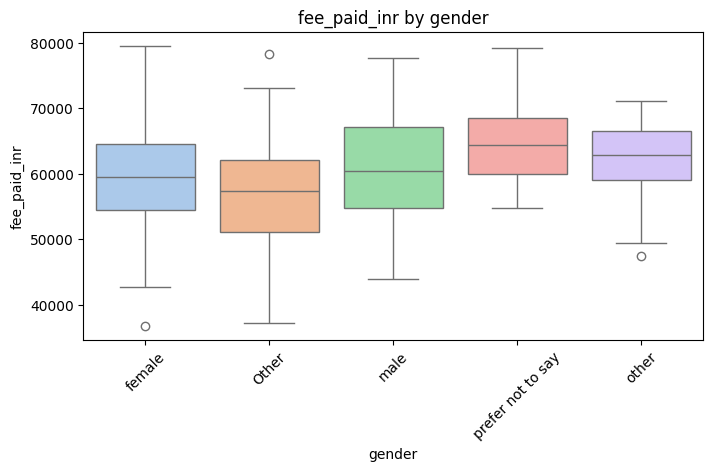

Interpretation: Median fee_paid_inr varies across gender categories: {'Missing': 57306.0, 'female': 59519.0, 'male': 60416.0, 'other': 62920.0, 'prefer not to say': 64400.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


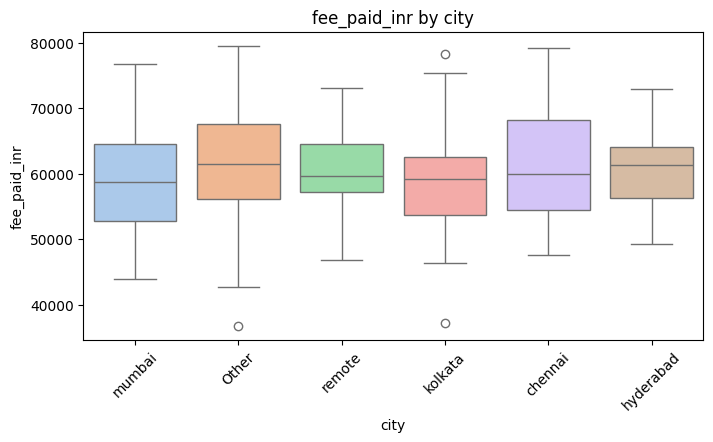

/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


Interpretation: Median fee_paid_inr varies across city categories: {'Missing': 65526.0, 'bengaluru': 61536.5, 'chennai': 59975.0, 'delhi': 61739.0, 'hyderabad': 61305.5, 'kolkata': 59143.5, 'mumbai': 58700.5, 'pune': 59843.0, 'remote': 59702.0}



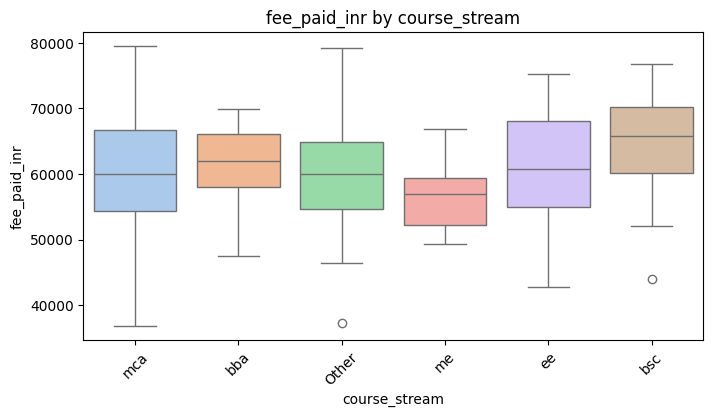

Interpretation: Median fee_paid_inr varies across course_stream categories: {'Missing': 60523.0, 'bba': 61910.0, 'bsc': 65861.0, 'cs': 60746.5, 'ece': 60273.0, 'ee': 60710.5, 'mba': 58203.0, 'mca': 59942.5, 'me': 56967.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


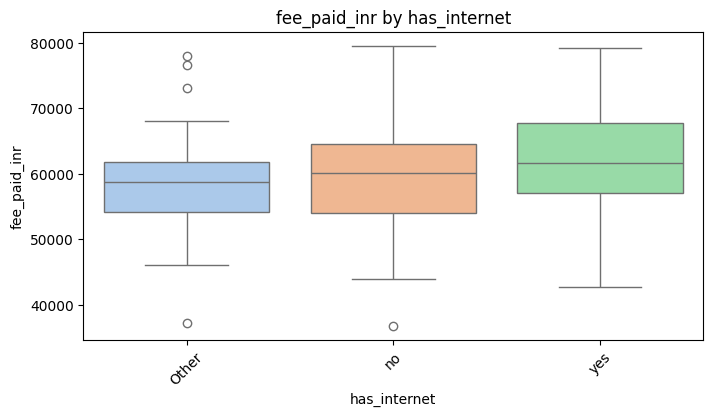

Interpretation: Median fee_paid_inr varies across has_internet categories: {'Missing': 58800.0, 'no': 60125.0, 'yes': 61609.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


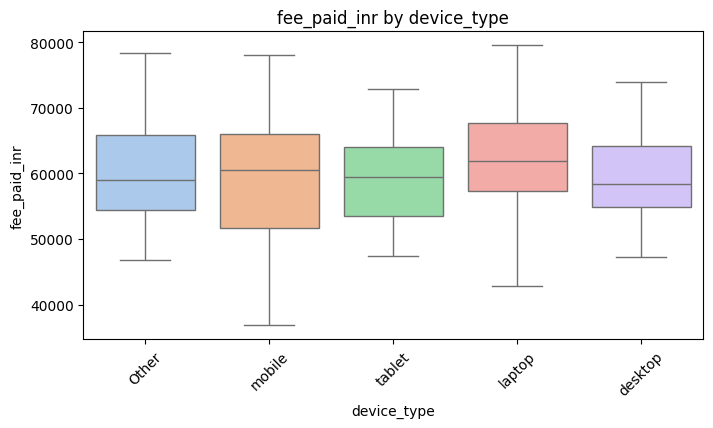

Interpretation: Median fee_paid_inr varies across device_type categories: {'Missing': 58961.0, 'desktop': 58375.0, 'laptop': 61910.0, 'mobile': 60477.0, 'tablet': 59427.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


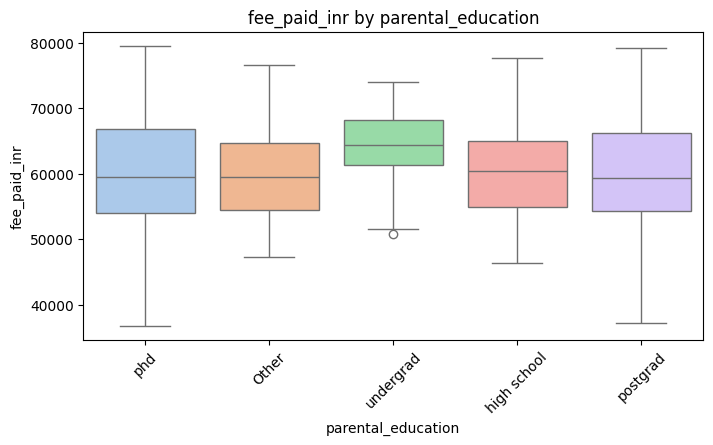

Interpretation: Median fee_paid_inr varies across parental_education categories: {'Missing': 59493.0, 'high school': 60370.5, 'phd': 59539.0, 'postgrad': 59321.5, 'undergrad': 64410.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


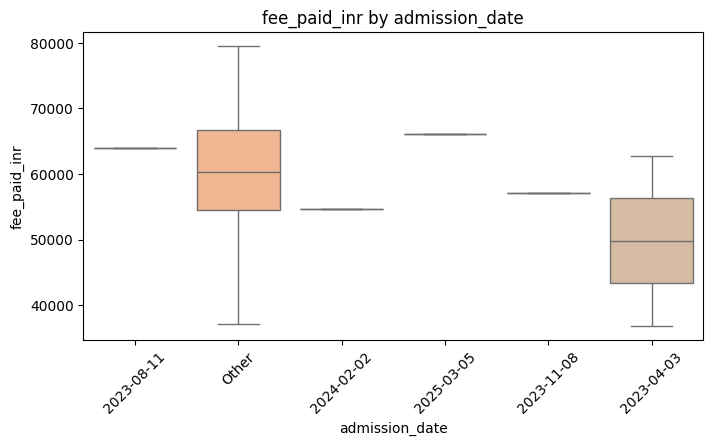

Interpretation: Median fee_paid_inr varies across admission_date categories: {'2023-01-04': 64420.0, '2023-01-07': 69982.0, '2023-04-03': 49801.0, '2023-04-06': nan, '2023-05-03': 73113.0, '2023-06-04': 50829.0, '2023-06-05': 63816.0, '2023-06-10': 46837.0, '2023-07-04': 47553.0, '2023-07-09': 70913.0, '2023-08-06': nan, '2023-08-11': 63952.0, '2023-10-05': 59702.0, '2023-11-03': 50499.0, '2023-11-08': 57100.0, '2024-01-02': 54806.0, '2024-02-02': 54627.0, '2024-02-05': 65861.0, '2024-02-08': 52069.0, '2024-04-12': 65110.0, '2024-08-11': 68181.0, '2024-09-04': 58475.0, '2024-10-08': 60843.0, '2024-12-05': 79518.0, '2024-12-08': 52253.0, '2025-03-05': 66174.0, '2025-06-04': 58800.0, 'Missing': 60350.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


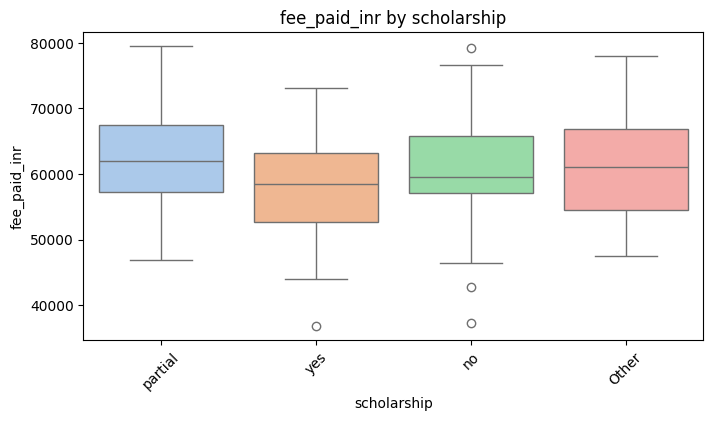

Interpretation: Median fee_paid_inr varies across scholarship categories: {'Missing': 60990.0, 'no': 59499.0, 'partial': 61910.0, 'yes': 58429.0}



/tmp/ipython-input-2614446438.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')


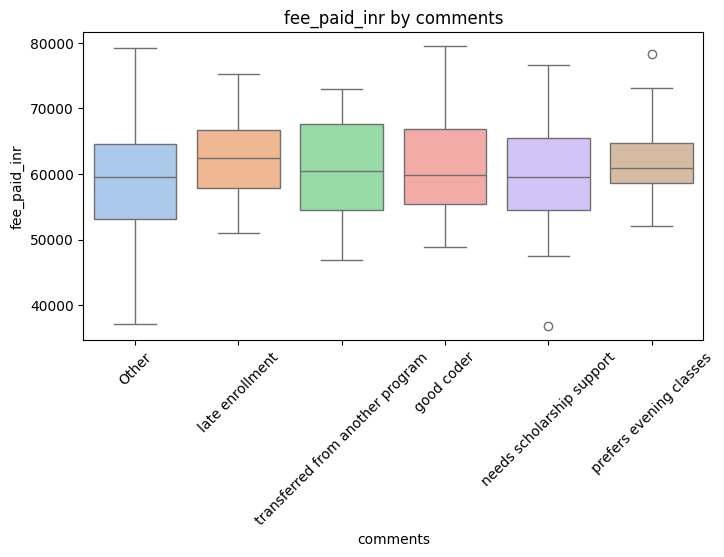

Interpretation: Median fee_paid_inr varies across comments categories: {'Missing': 59539.0, 'good coder': 59813.5, 'late enrollment': 62428.5, 'needs scholarship support': 59556.0, 'prefers evening classes': 61003.5, 'transferred from another program': 60452.5}



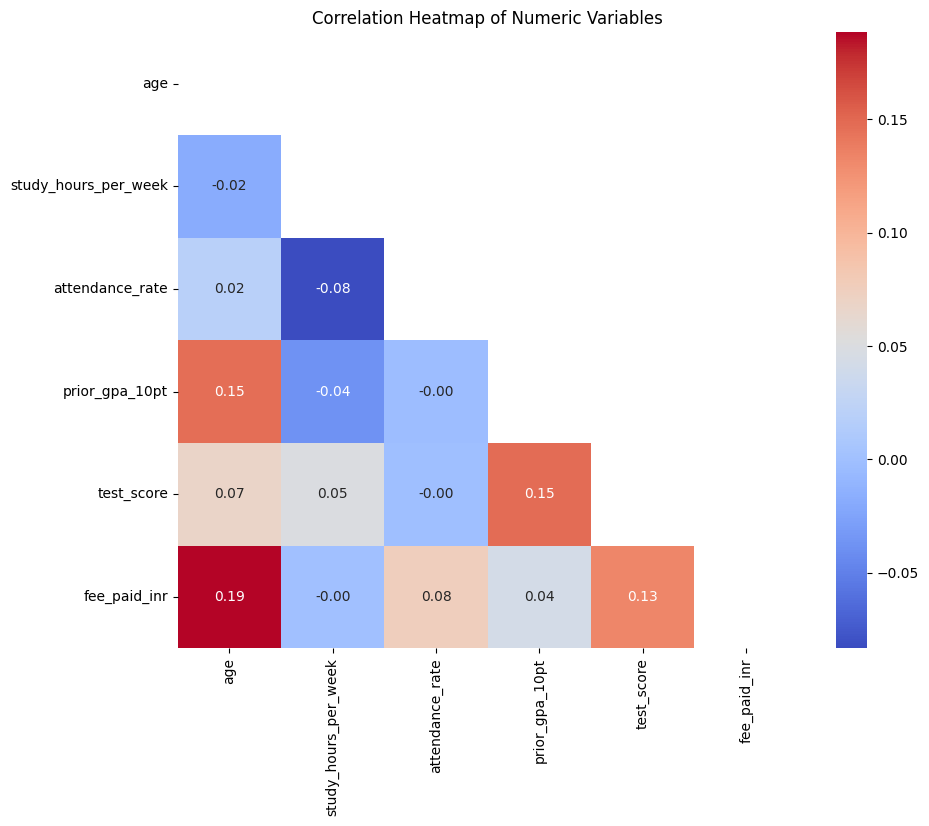

Interpretation: Heatmap shows pairwise correlations. Strong correlations may indicate related features.



In [21]:
#bivariated graphs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")
# --- Scatterplots: Numeric vs Numeric ---
numeric_cols = df.select_dtypes(include='number').columns.tolist() # Get numeric columns after feature engineering
# Filter out non-numeric columns that might have been created during cleaning
numeric_cols = [col for col in numeric_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

categorical_cols = df.select_dtypes(include='object').columns.tolist() # Get categorical columns after feature engineering
top_n = 5

for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        x_col = numeric_cols[i]
        y_col = numeric_cols[j]

        plt.figure(figsize=(6,4))
        # sample if too many points, use alpha for transparency
        sns.scatterplot(x=x_col, y=y_col, data=df.sample(min(500, len(df))).dropna(subset=[x_col, y_col]), alpha=0.6, color='teal') # Drop NaNs for scatterplot
        plt.title(f'{x_col} vs {y_col}')
        plt.show()
        corr = df[x_col].corr(df[y_col])
        print(f"Interpretation: Correlation between {x_col} and {y_col} is {corr:.2f}. Scatter shows linearity/clusters.\n")

# --- Boxplots: Numeric vs Categorical ---
for num_col in numeric_cols:
    for cat_col in categorical_cols:
        # group less frequent categories
        top_categories = df[cat_col].value_counts().nlargest(top_n).index
        df_plot = df[cat_col].apply(lambda x: x if x in top_categories else 'Other')

        plt.figure(figsize=(8,4))
        sns.boxplot(x=df_plot, y=df[num_col], palette='pastel')
        plt.title(f'{num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

        # Calculate medians, handling potential NaNs in grouping column
        medians = df.groupby(df[cat_col].fillna('Missing'))[num_col].median().to_dict()
        print(f"Interpretation: Median {num_col} varies across {cat_col} categories: {medians}\n")

# --- Correlation Heatmap ---
# Ensure only numeric columns are used for correlation
numeric_df_for_corr = df[numeric_cols].dropna()
if not numeric_df_for_corr.empty:
    plt.figure(figsize=(10,8))
    mask = np.triu(np.ones_like(numeric_df_for_corr.corr(), dtype=bool))
    sns.heatmap(numeric_df_for_corr.corr(), mask=mask, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()
    print("Interpretation: Heatmap shows pairwise correlations. Strong correlations may indicate related features.\n")
else:
    print("Not enough complete numeric data to generate correlation heatmap.")

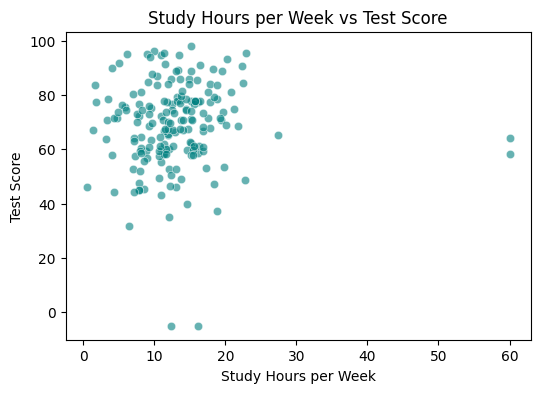

Correlation between study_hours_per_week and test_score: 0.03
Interpretation: Positive correlation indicates that higher study hours generally correspond to higher test scores.

'has_internet' column is in df. Columns: ['student_id', 'age', 'gender', 'city', 'course_stream', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'has_internet', 'device_type', 'parental_education', 'test_score', 'admission_date', 'fee_paid_inr', 'scholarship', 'comments']


/tmp/ipython-input-3934794696.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='has_internet', y='test_score', data=df, palette='pastel')


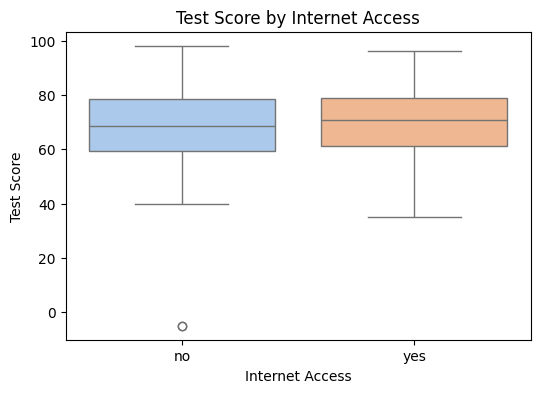

Mean test scores by internet access: {'Missing': 67.092, 'no': 68.12705882352941, 'yes': 71.06}
Interpretation: Students with internet access generally have higher average test scores than those without.



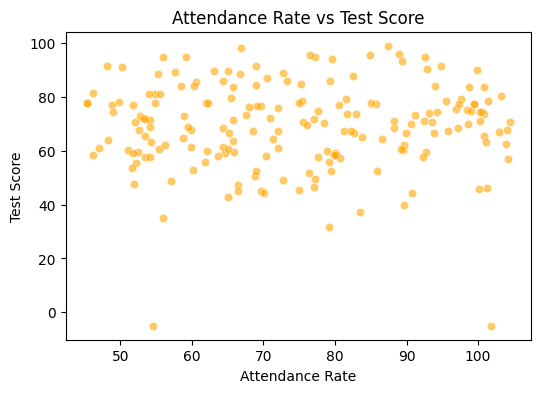

Correlation between attendance_rate and test_score: 0.02
Interpretation: Positive correlation indicates that higher attendance is associated with better test performance.



In [20]:
# identitfying the relationship
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")
# 1️⃣ Study hours vs Test Score (numeric vs numeric)
plt.figure(figsize=(6,4))
sns.scatterplot(x='study_hours_per_week', y='test_score', data=df, alpha=0.6, color='teal')
plt.title('Study Hours per Week vs Test Score')
plt.xlabel('Study Hours per Week')
plt.ylabel('Test Score')
plt.show()

# Correlation coefficient
corr_study_test = df['study_hours_per_week'].corr(df['test_score'])
print(f"Correlation between study_hours_per_week and test_score: {corr_study_test:.2f}")
print("Interpretation: Positive correlation indicates that higher study hours generally correspond to higher test scores.\n")

# 2️⃣ Internet access vs Performance (numeric vs categorical)
# Ensure 'has_internet' is treated as categorical for plotting
if 'has_internet' in df.columns:
    print(f"'has_internet' column is in df. Columns: {df.columns.tolist()}") # Added print statement for debugging
    plt.figure(figsize=(6,4))
    sns.boxplot(x='has_internet', y='test_score', data=df, palette='pastel')
    plt.title('Test Score by Internet Access')
    plt.xlabel('Internet Access')
    plt.ylabel('Test Score')
    plt.show()

    # Calculate mean scores, handling potential NaNs in grouping column
    mean_scores_internet = df.groupby(df['has_internet'].fillna('Missing'))['test_score'].mean().to_dict()
    print(f"Mean test scores by internet access: {mean_scores_internet}")
    print("Interpretation: Students with internet access generally have higher average test scores than those without.\n")
else:
    print("'has_internet' column not found for plotting.")


# 3️⃣ Attendance rate vs Test Score (numeric vs numeric)
plt.figure(figsize=(6,4))
sns.scatterplot(x='attendance_rate', y='test_score', data=df, alpha=0.6, color='orange')
plt.title('Attendance Rate vs Test Score')
plt.xlabel('Attendance Rate')
plt.ylabel('Test Score')
plt.show()

corr_attendance_test = df['attendance_rate'].corr(df['test_score'])
print(f"Correlation between attendance_rate and test_score: {corr_attendance_test:.2f}")
print("Interpretation: Positive correlation indicates that higher attendance is associated with better test performance.\n")

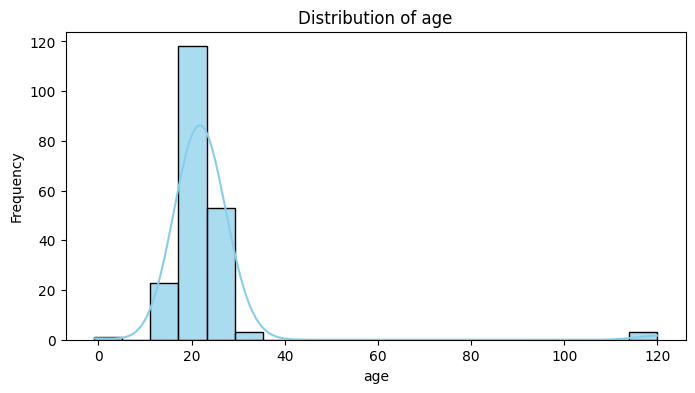

Interpretation: age distribution shows central tendency, skewness, and potential outliers.



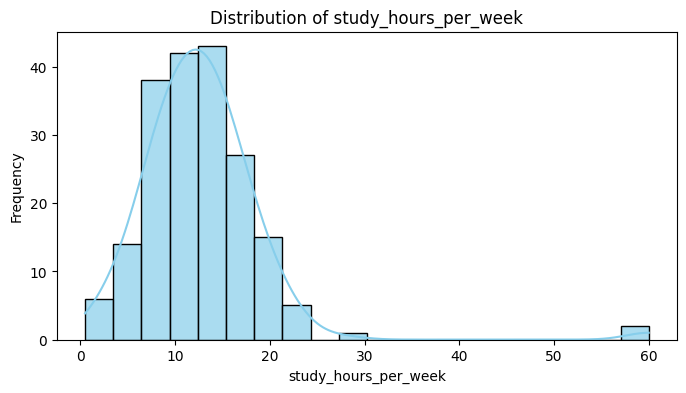

Interpretation: study_hours_per_week distribution shows central tendency, skewness, and potential outliers.



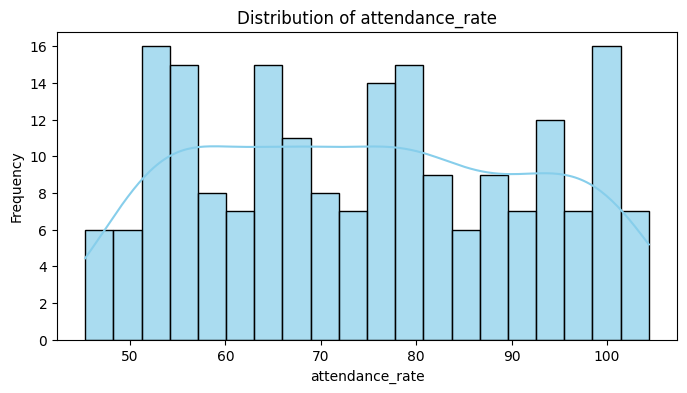

Interpretation: attendance_rate distribution shows central tendency, skewness, and potential outliers.



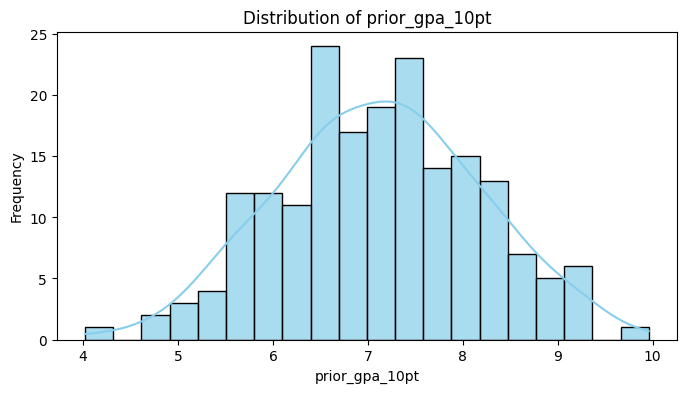

Interpretation: prior_gpa_10pt distribution shows central tendency, skewness, and potential outliers.



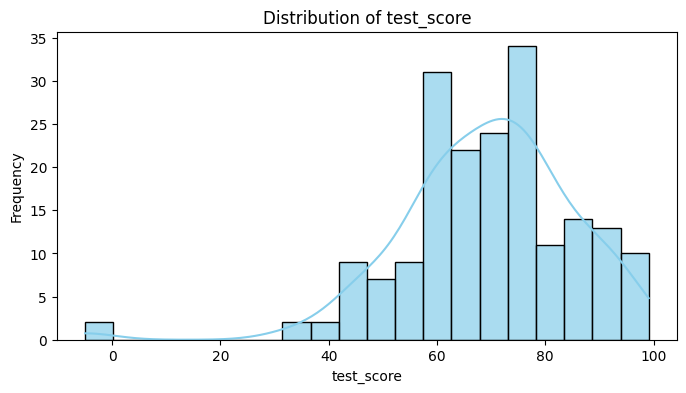

Interpretation: test_score distribution shows central tendency, skewness, and potential outliers.



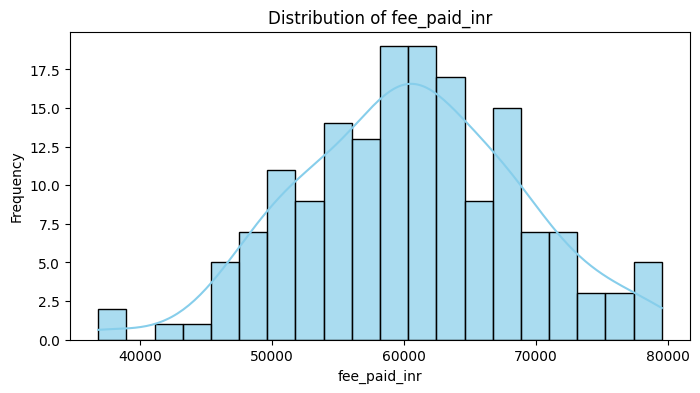

Interpretation: fee_paid_inr distribution shows central tendency, skewness, and potential outliers.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


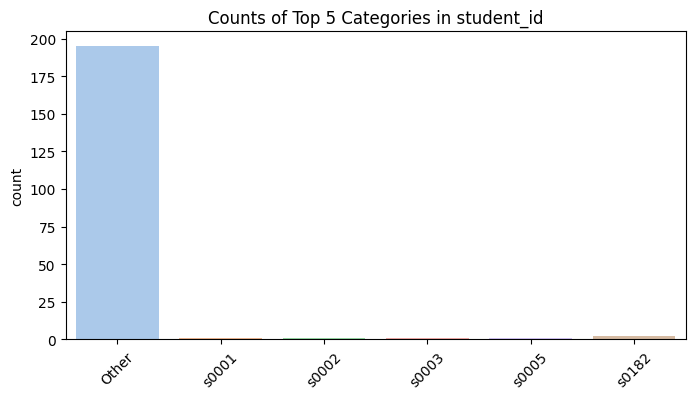

Interpretation: Top 5 categories dominate student_id; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


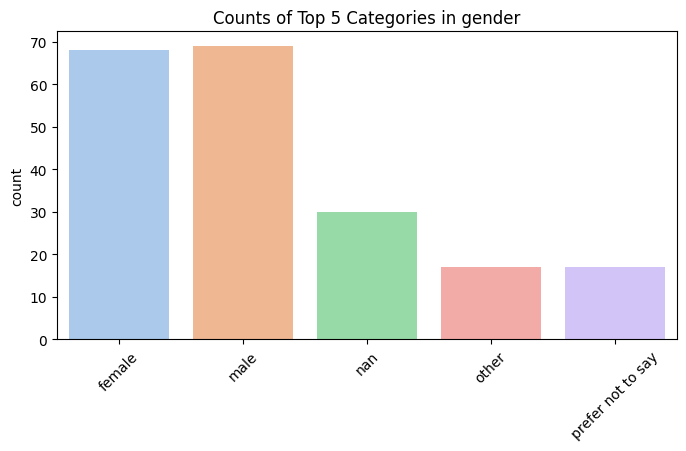

Interpretation: Top 5 categories dominate gender; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


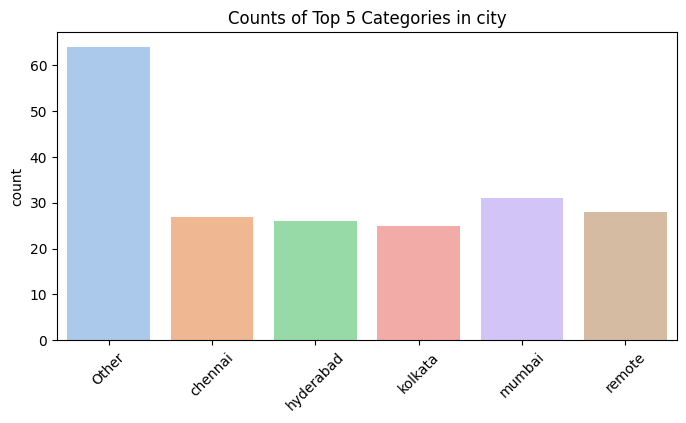

Interpretation: Top 5 categories dominate city; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


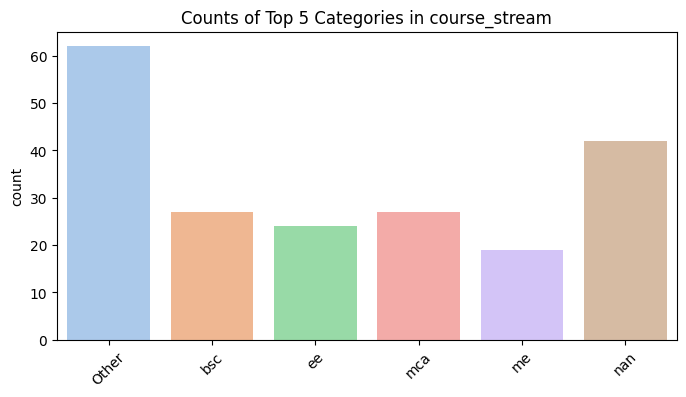

Interpretation: Top 5 categories dominate course_stream; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


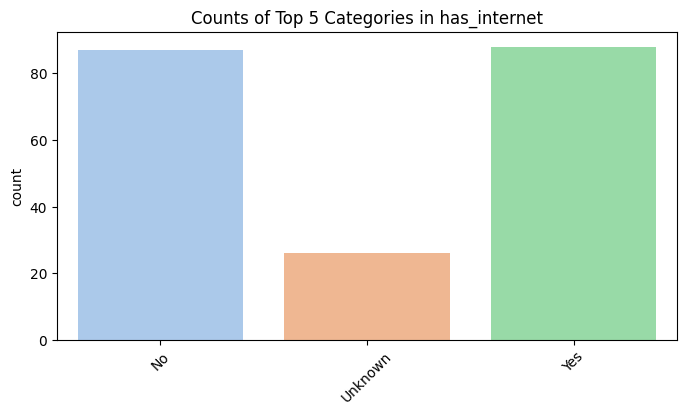

Interpretation: Top 5 categories dominate has_internet; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


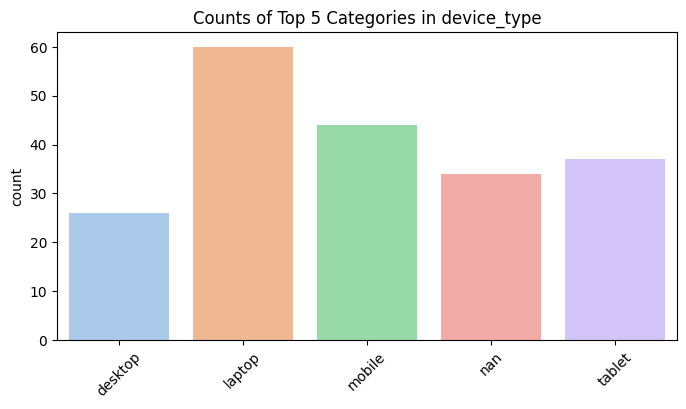

Interpretation: Top 5 categories dominate device_type; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


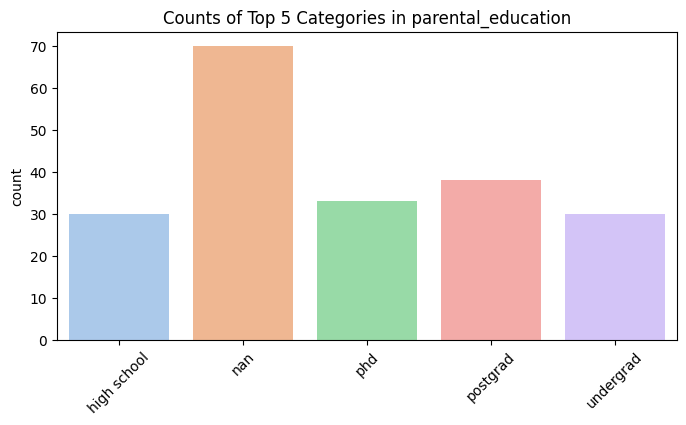

Interpretation: Top 5 categories dominate parental_education; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


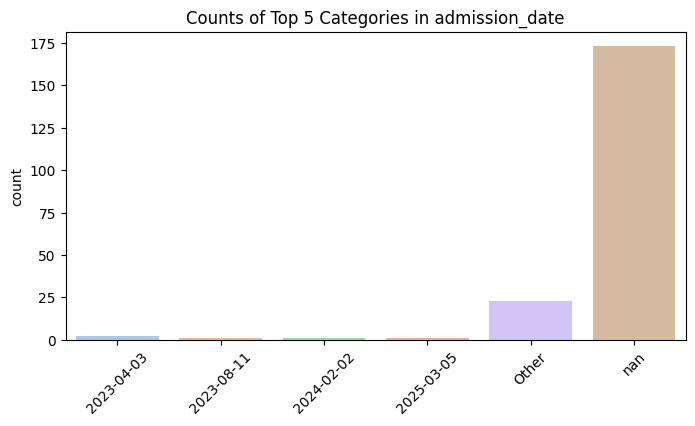

Interpretation: Top 5 categories dominate admission_date; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


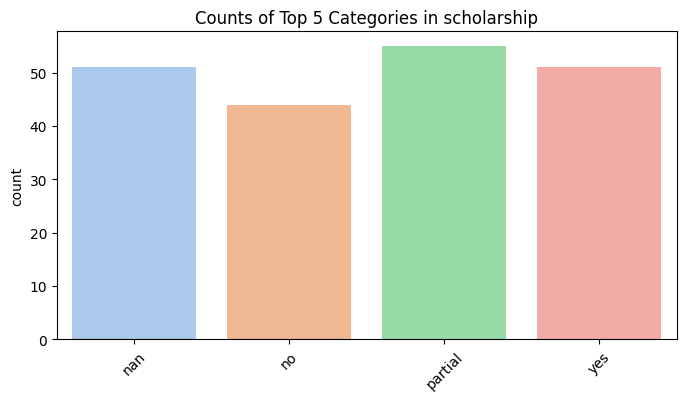

Interpretation: Top 5 categories dominate scholarship; remaining grouped as 'Other'.



/tmp/ipython-input-1436006960.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')


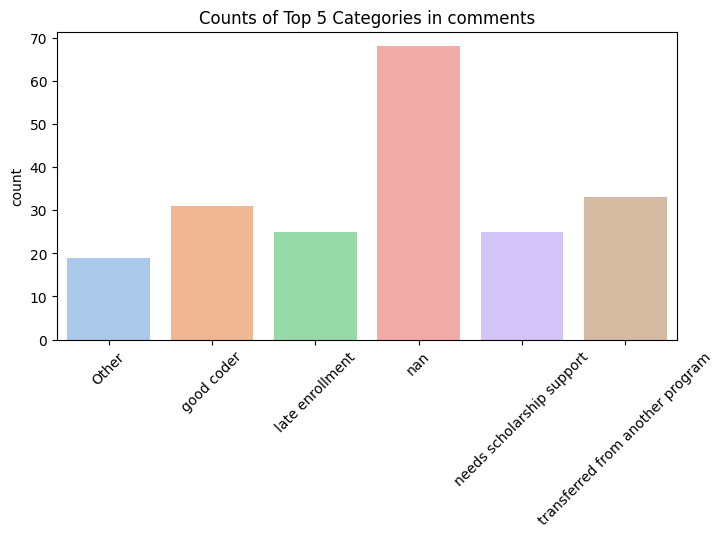

Interpretation: Top 5 categories dominate comments; remaining grouped as 'Other'.



In [19]:
#part C: Task 3: Exploratory Data Analysis (EDA) & Insights
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas
import numpy as np # Import numpy

# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")

# Apply minimal cleaning for plotting (standardize placeholders, trim, lower)
placeholders = ["", " ", "NA", "N/A", "na", "n/a", "None", "none",
                "Unknown", "unknown", "NULL", "null", "—", "-", "#N/A", "NaN", "nan"]
for ph in placeholders:
    df.replace(ph, np.nan, inplace=True)

text_cols = df.select_dtypes(include='object').columns
for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

# Standardize 'has_internet' values
if "has_internet" in df.columns:
    def clean_net(x):
        if pd.isna(x): return np.nan
        s = str(x).strip().lower()
        if s in {"y","yes","true","1","available","yep","yeah"}: return "Yes"
        if s in {"n","no","false","0","not available","nope"}: return "No"
        return "Unknown"
    df["has_internet"] = df["has_internet"].apply(clean_net)

numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

top_n = 5  # show only top 5 categories

# --- Numeric variables ---
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), kde=True, bins=20, color='skyblue', alpha=0.7) # Drop NaNs for plotting
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    print(f"Interpretation: {col} distribution shows central tendency, skewness, and potential outliers.\n")

# --- Categorical variables ---
for col in categorical_cols:
    # Group less frequent categories into 'Other'
    top_categories = df[col].value_counts().nlargest(top_n).index
    df_plot = df[col].apply(lambda x: x if x in top_categories else 'Other')

    plt.figure(figsize=(8,4))
    sns.countplot(x=pd.Categorical(df_plot), order=pd.Categorical(df_plot).value_counts().index, palette='pastel')
    plt.title(f'Counts of Top {top_n} Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()
    print(f"Interpretation: Top {top_n} categories dominate {col}; remaining grouped as 'Other'.\n")

In [33]:
#part D
#creating new features
import pandas as pd
# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")
# 1️⃣ Attendance Category
df['attendance_category'] = pd.cut(
    df['attendance_rate'],
    bins=[-1, 50, 75, 100],
    labels=['Low', 'Medium', 'High']
)

# 2️⃣ GPA Band
df['gpa_band'] = pd.cut(
    df['prior_gpa_10pt'],
    bins=[-1, 5, 8, 10],
    labels=['Low', 'Medium', 'High']
)

# 3️⃣ Study Hours Bin (discretized study hours per week)
df['study_hours_bin'] = pd.cut(
    df['study_hours_per_week'],
    bins=[-1, 10, 20, 40, 60],
    labels=['0–10 hrs', '11–20 hrs', '21–40 hrs', '41+ hrs']
)

# Preview new columns
print(df[['attendance_rate','attendance_category',
          'prior_gpa_10pt','gpa_band',
          'study_hours_per_week','study_hours_bin']].head())

   attendance_rate attendance_category  prior_gpa_10pt gpa_band  \
0             46.2                 Low            6.88   Medium   
1             64.3              Medium            5.87   Medium   
2             57.7              Medium             NaN      NaN   
3             64.6              Medium            7.27   Medium   
4             52.2              Medium            7.22   Medium   

   study_hours_per_week study_hours_bin  
0                  11.2       11–20 hrs  
1                  14.9       11–20 hrs  
2                  13.4       11–20 hrs  
3                   8.9        0–10 hrs  
4                  11.0       11–20 hrs  


Skewness of numeric columns:
 age                     6.908069
study_hours_per_week    3.462113
attendance_rate         0.080378
prior_gpa_10pt         -0.020639
test_score             -1.059323
fee_paid_inr           -0.036757
dtype: float64

Highly skewed features: ['age', 'study_hours_per_week', 'test_score']


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


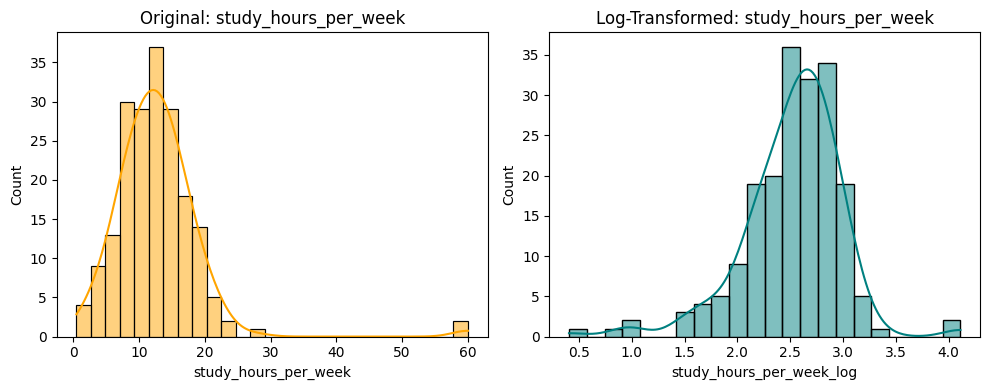

In [37]:
##Handle skewed numeric columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")
# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Calculate skewness
skewness = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print("Skewness of numeric columns:\n", skewness)

# Identify highly skewed (|skew| > 1)
skewed_features = skewness[abs(skewness) > 1].index
print("\nHighly skewed features:", list(skewed_features))

# Apply log(1+x) transform to skewed columns
for col in skewed_features:
    df[col + "_log"] = np.log1p(df[col])   # create new log-transformed version

# Compare distributions before & after (example: study_hours_per_week)
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(df['study_hours_per_week'], kde=True, ax=axes[0], color='orange')
axes[0].set_title('Original: study_hours_per_week')

sns.histplot(df['study_hours_per_week_log'], kde=True, ax=axes[1], color='teal')
axes[1].set_title('Log-Transformed: study_hours_per_week')

plt.tight_layout()
plt.show()


In [40]:
#Encode Categorical Features
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", list(cat_cols))

# Example: if we know some are ordinal, we can Label Encode them
ordinal_features = ['attendance_rate', 'age', 'study_hours_per_week']  # from feature engineering
label_encoders = {}

for col in ordinal_features:
    le = LabelEncoder()
    df[col + "_enc"] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # store encoder for inverse transform later

# For nominal features, apply One-Hot Encoding
nominal_features = [col for col in cat_cols if col not in ordinal_features]
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

# Preview encoded dataset
print(df.head())

Categorical Columns: ['student_id', 'gender', 'city', 'course_stream', 'has_internet', 'device_type', 'parental_education', 'admission_date', 'scholarship', 'comments']
   age  study_hours_per_week  attendance_rate  prior_gpa_10pt  test_score  \
0   24                  11.2             46.2            6.88        58.4   
1   21                  14.9             64.3            5.87        85.8   
2   24                  13.4             57.7             NaN        89.3   
3   28                   8.9             64.6            7.27        59.4   
4   21                  11.0             52.2            7.22        55.5   

   fee_paid_inr  attendance_rate_enc  age_enc  study_hours_per_week_enc  \
0       63952.0                   17       10                        11   
1       62085.0                   68        7                        42   
2       55598.0                   51       10                        31   
3       54627.0                   70       14                       

In [41]:
#Scaling Numeric Features
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
# Reload the raw data for EDA
df = pd.read_csv("/content/STUDENTS_CLEANED_DATA .csv")
# Select numeric columns (excluding IDs)
num_cols = df.select_dtypes(include=['int64','float64']).columns
print("Numeric Columns Before Scaling:", list(num_cols))

# Replace infinite values with NaN and then impute NaNs with median
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


# Example 1: StandardScaler
scaler_std = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_std.fit_transform(df[num_cols])

# Example 2: MinMaxScaler
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[num_cols] = scaler_mm.fit_transform(df[num_cols])

# Compare original vs scaled (first 5 rows, first 5 numeric columns)
print("\nOriginal numeric values:\n", df[num_cols].head())
print("\nStandard Scaled values:\n", df_std[num_cols].head())
print("\nMinMax Scaled values:\n", df_mm[num_cols].head())

Numeric Columns Before Scaling: ['age', 'study_hours_per_week', 'attendance_rate', 'prior_gpa_10pt', 'test_score', 'fee_paid_inr']

Original numeric values:
    age  study_hours_per_week  attendance_rate  prior_gpa_10pt  test_score  \
0   24                  11.2             46.2            6.88        58.4   
1   21                  14.9             64.3            5.87        85.8   
2   24                  13.4             57.7            7.15        89.3   
3   28                   8.9             64.6            7.27        59.4   
4   21                  11.0             52.2            7.22        55.5   

   fee_paid_inr  
0       63952.0  
1       62085.0  
2       55598.0  
3       54627.0  
4       60350.0  

Standard Scaled values:
         age  study_hours_per_week  attendance_rate  prior_gpa_10pt  \
0  0.060618             -0.226807        -1.696147       -0.232785   
1 -0.179861              0.330985        -0.620616       -1.210800   
2  0.060618              0.104853  

In [ ]:
## saving of the dataset
# Assuming df is now fully processed (cleaned, encoded, scaled)
output_path = "STUDENTS_MODEL_DATA.csv."

# Save to CSV
df.to_csv(output_path, index=False)

print(f"Model-ready dataset saved successfully as {output_path}")


Model-ready dataset saved successfully as dataset_model_ready.csv


Loaded shape: (200, 49)
Features used: 45 columns
Train / Test shapes: (160, 45) (40, 45)
Baseline (mean) Test RMSE: 156.78135039062497
--- LinearRegression ---
CV RMSE (5-fold): 17.1349
Test RMSE: 147.0717 | MAE: 9.1028 | R2: 0.0403
--- RidgeCV ---
CV RMSE (5-fold): 13.9883
Test RMSE: 151.9613 | MAE: 9.2206 | R2: 0.0084
--- LassoCV ---
CV RMSE (5-fold): 13.9623
Test RMSE: 155.7186 | MAE: 9.2764 | R2: -0.0161
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
--- RandomForest (best) ---
CV RMSE (5-fold): 14.0973
Test RMSE: 179.8255 | MAE: 10.3459 | R2: -0.1735
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best GB params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
--- GradientBoosting (best) ---
CV RMSE (5-fold): 14.7418
Test RMSE: 195.6234 | MAE: 10.5247 | R2: -0.2765

Model comparison (test):
               model   rmse_test   mae_test   r2_test
1            Linea

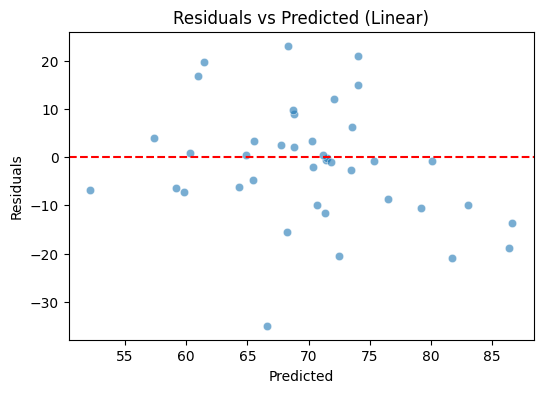

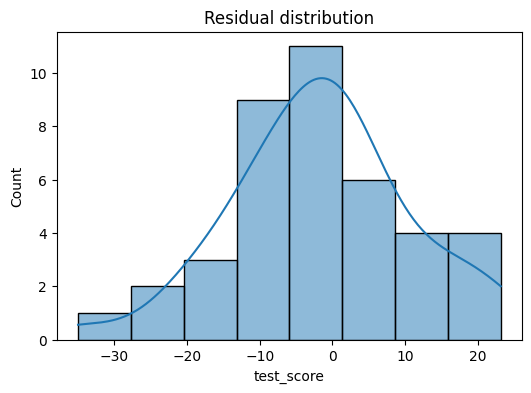

Saved best model to best_model.joblib
Saved predictions to predictions_test_set.csv


In [43]:
##part E
# Predictive modeling for target: test_score (regression)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

RND = 42  # reproducible seed

# 1) Load data
df = pd.read_csv("STUDENTS_MODEL_DATA.csv")
print("Loaded shape:", df.shape)

# 2) Prepare X, y (drop possible ID columns)
target = "test_score"
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in dataset.")

# drop id-like columns (student_id) if present
id_cols = [c for c in df.columns if c.lower().endswith("id") or c.lower()=="index"]
X = df.drop(columns=[target] + id_cols)
y = df[target].copy()

# Keep only numeric features (model-ready should already be numeric)
X = X.select_dtypes(include=[np.number])
print("Features used:", X.shape[1], "columns")

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RND
)
print("Train / Test shapes:", X_train.shape, X_test.shape)

# Helper: evaluation function
def evaluate_model(name, model, X_train, y_train, X_test, y_test, cv=5):
    cv = KFold(n_splits=cv, shuffle=True, random_state=RND)
    # CV RMSE
    scores = cross_val_score(model, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=cv, n_jobs=-1)
    rmse_cv = np.sqrt(-scores).mean()
    # fit & test
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, y_pred) # Removed squared=False
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    print(f"--- {name} ---")
    print(f"CV RMSE (5-fold): {rmse_cv:.4f}")
    print(f"Test RMSE: {rmse_test:.4f} | MAE: {mae_test:.4f} | R2: {r2_test:.4f}")
    return model, y_pred

# 4) Baseline: mean predictor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
print("Baseline (mean) Test RMSE:", mean_squared_error(y_test, y_pred_dummy)) # Removed squared=False

# 5) Linear Regression baseline
lr = LinearRegression()
lr_model, lr_pred = evaluate_model("LinearRegression", lr, X_train, y_train, X_test, y_test)

# 6) Regularized linear models
# RidgeCV (automatic alpha search)
ridge_alphas = np.logspace(-3, 3, 7)
ridge = RidgeCV(alphas=ridge_alphas, cv=5, scoring="neg_mean_squared_error")
ridge_model, ridge_pred = evaluate_model("RidgeCV", ridge, X_train, y_train, X_test, y_test)

# LassoCV (feature selection)
lasso = LassoCV(cv=5, random_state=RND, n_alphas=50, max_iter=5000)
lasso_model, lasso_pred = evaluate_model("LassoCV", lasso, X_train, y_train, X_test, y_test)

# 7) Tree-based models (GridSearch for RandomForest and GradientBoosting)
rf = RandomForestRegressor(random_state=RND)
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
rf_gs = GridSearchCV(rf, rf_param_grid, scoring="neg_mean_squared_error", cv=3, n_jobs=-1, verbose=1)
rf_gs.fit(X_train, y_train)
best_rf = rf_gs.best_estimator_
print("Best RF params:", rf_gs.best_params_)
best_rf, rf_pred = evaluate_model("RandomForest (best)", best_rf, X_train, y_train, X_test, y_test)

gb = GradientBoostingRegressor(random_state=RND)
gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}
gb_gs = GridSearchCV(gb, gb_param_grid, scoring="neg_mean_squared_error", cv=3, n_jobs=-1, verbose=1)
gb_gs.fit(X_train, y_train)
best_gb = gb_gs.best_estimator_
print("Best GB params:", gb_gs.best_params_)
best_gb, gb_pred = evaluate_model("GradientBoosting (best)", best_gb, X_train, y_train, X_test, y_test)

# 8) Compare test RMSE and pick best
results = []
for name, preds, model in [
    ("Baseline", y_pred_dummy, dummy),
    ("Linear", lr_pred, lr_model),
    ("Ridge", ridge_pred, ridge_model),
    ("Lasso", lasso_pred, lasso_model),
    ("RandomForest", rf_pred, best_rf),
    ("GradientBoosting", gb_pred, best_gb),
]:
    rmse = mean_squared_error(y_test, preds) # Removed squared=False
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    results.append((name, rmse, mae, r2))
res_df = pd.DataFrame(results, columns=["model", "rmse_test", "mae_test", "r2_test"]).sort_values("rmse_test")
print("\nModel comparison (test):\n", res_df)

best_name = res_df.iloc[0]["model"]
print("Best model:", best_name)

# Select best_model object
best_model = {
    "RandomForest": best_rf,
    "GradientBoosting": best_gb,
    "Ridge": ridge_model,
    "Lasso": lasso_model,
    "Linear": lr_model,
    "Baseline": dummy
}[best_name]

# 9) Diagnostics for chosen model
y_pred_best = best_model.predict(X_test)
residuals = y_test - y_pred_best

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title(f"Residuals vs Predicted ({best_name})")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Residual distribution")
plt.show()

# 10) Feature importance (if tree model)
if hasattr(best_model, "feature_importances_"):
    fi = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Top features:\n", fi.head(20))
    plt.figure(figsize=(8,6))
    fi.head(20).plot(kind="barh")
    plt.gca().invert_yaxis()
    plt.title("Feature importances")
    plt.show()

# 11) Save best model & predictions
joblib.dump(best_model, "best_model.joblib")
print("Saved best model to best_model.joblib")

pred_df = X_test.copy()
pred_df["y_true"] = y_test.values
pred_df["y_pred"] = y_pred_best
pred_df.to_csv("predictions_test_set.csv", index=False)
print("Saved predictions to predictions_test_set.csv")

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load processed dataset
df = pd.read_csv("STUDENTS_MODEL_DATA.csv")

# Define target
target = "test_score"
X = df.drop(columns=[target])   # Features
y = df[target]                  # Target

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

Shapes:
X_train: (160, 48)
X_test : (40, 48)
y_train: (160,)
y_test : (40,)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd



# --- Helper function for evaluation ---
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # No squared=False argument in newer sklearn versions for mean_squared_error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print("-" * 30)
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")

    return model, y_pred

# Load the preprocessed and encoded dataset
df = pd.read_csv("STUDENTS_MODEL_DATA.csv")

# Define target and features (excluding any ID columns if present)
target = "test_score"
id_cols = [c for c in df.columns if c.lower().endswith("id") or c.lower()=="index"]
X = df.drop(columns=[target] + id_cols)
y = df[target].copy()

# Ensure X only contains numeric features
X = X.select_dtypes(include=[np.number])


# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# --- 1. Linear Regression ---
lr = LinearRegression()
lr_model, lr_pred = evaluate_model("Linear Regression", lr, X_train, y_train, X_test, y_test)

# --- 2. Decision Tree Regressor ---
dt = DecisionTreeRegressor(random_state=42)
dt_model, dt_pred = evaluate_model("Decision Tree", dt, X_train, y_train, X_test, y_test)

# --- 3. Random Forest Regressor ---
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model, rf_pred = evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)


Linear Regression
------------------------------
RMSE: 12.1273
MAE : 9.1028
R²  : 0.0403

Decision Tree
------------------------------
RMSE: 20.1074
MAE : 15.4250
R²  : -1.6383

Random Forest
------------------------------
RMSE: 13.2186
MAE : 10.1967
R²  : -0.1402


In [48]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Collect results into a DataFrame for comparison
results = []

# Linear Regression metrics
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
results.append(("Linear Regression", lr_rmse, lr_r2))

# Decision Tree metrics
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)
results.append(("Decision Tree", dt_rmse, dt_r2))

# Random Forest metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
results.append(("Random Forest", rf_rmse, rf_r2))

# Create comparison table
comparison_df = pd.DataFrame(results, columns=["Model", "RMSE", "R²"]).sort_values(by="RMSE")
print("\nModel Comparison:\n")
print(comparison_df)


Model Comparison:

               Model       RMSE        R²
0  Linear Regression  12.127313  0.040281
2      Random Forest  13.218573 -0.140208
1      Decision Tree  20.107449 -1.638328


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_grid = {
    "fit_intercept": [True, False],
    "positive": [True, False]  # optional: force coefficients to be positive
}

# GridSearchCV
lr = LinearRegression()
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)

# Best model
best_lr = grid_search.best_estimator_

# Evaluate tuned model
best_lr_pred = best_lr.predict(X_test)
best_rmse = np.sqrt(mean_squared_error(y_test, best_lr_pred))
best_r2 = r2_score(y_test, best_lr_pred)

print("\nTuned Linear Regression Performance:")
print(f"RMSE: {best_rmse:.4f}")
print(f"R²  : {best_r2:.4f}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits

Best Parameters: {'fit_intercept': False, 'positive': True}

Tuned Linear Regression Performance:
RMSE: 12.0526
R²  : 0.0521
